Road accidents Belgium 2005-2018 

D:\Github\Road_accidents_Belgium

Source:

Data available at https://statbel.fgov.be/en/open-data. This data is made available under the 'Licentie open data' which is compatible with the Creative Commons Attribution 2.0 license https://creativecommons.org/licenses/by/2.0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os, re, sys

In [2]:
# 'geopandas' in sys.modules

In [3]:
# conda list

In [4]:
os.getcwd()

'D:\\GitHub\\Road_accidents_Belgium'

In [5]:
os.chdir('D:\\GitHub\\Road_accidents_Belgium\\Accidents')

In [6]:
os.getcwd()

'D:\\GitHub\\Road_accidents_Belgium\\Accidents'

In [7]:
path = os.getcwd()
files = os.listdir(path)

In [8]:
files_xls = [f for f in files if f[-4:] == 'xlsx']

In [9]:
files_xls

['TF_ACCIDENTS_2005.xlsx',
 'TF_ACCIDENTS_2006.xlsx',
 'TF_ACCIDENTS_2007.xlsx',
 'TF_ACCIDENTS_2008.xlsx',
 'TF_ACCIDENTS_2009.xlsx',
 'TF_ACCIDENTS_2010.xlsx',
 'TF_ACCIDENTS_2011.xlsx',
 'TF_ACCIDENTS_2012.xlsx',
 'TF_ACCIDENTS_2013.xlsx',
 'TF_ACCIDENTS_2014.xlsx',
 'TF_ACCIDENTS_2015.xlsx',
 'TF_ACCIDENTS_2016.xlsx',
 'TF_ACCIDENTS_2017.xlsx',
 'TF_ACCIDENTS_2018.xlsx']

In [10]:
df_accidents = pd.DataFrame()

In [11]:
#Make one dataframe out of all the .xlsx files
#Loop over list of files to append to empty dataframe:
for f in files_xls:
    data = pd.read_excel(f)
    df_accidents = df_accidents.append(data)

In [12]:
df_accidents.columns

Index(['DT_DAY', 'DT_HOUR', 'CD_DAY_OF_WEEK', 'TX_DAY_OF_WEEK_DESCR_FR',
       'TX_DAY_OF_WEEK_DESCR_NL', 'CD_BUILD_UP_AREA',
       'TX_BUILD_UP_AREA_DESCR_NL', 'TX_BUILD_UP_AREA_DESCR_FR',
       'CD_COLL_TYPE', 'TX_COLL_TYPE_DESCR_NL', 'TX_COLL_TYPE_DESCR_FR',
       'CD_LIGHT_COND', 'TX_LIGHT_COND_DESCR_NL', 'TX_LIGHT_COND_DESCR_FR',
       'CD_ROAD_TYPE', 'TX_ROAD_TYPE_DESCR_NL', 'TX_ROAD_TYPE_DESCR_FR',
       'CD_MUNTY_REFNIS', 'TX_MUNTY_DESCR_NL', 'TX_MUNTY_DESCR_FR',
       'CD_DSTR_REFNIS', 'TX_ADM_DSTR_DESCR_NL', 'TX_ADM_DSTR_DESCR_FR',
       'CD_PROV_REFNIS', 'TX_PROV_DESCR_NL', 'TX_PROV_DESCR_FR',
       'CD_RGN_REFNIS', 'TX_RGN_DESCR_NL', 'TX_RGN_DESCR_FR', 'MS_ACCT',
       'MS_ACCT_WITH_DEAD', 'MS_ACCT_WITH_DEAD_30_DAYS',
       'MS_ACCT_WITH_MORY_INJ', 'MS_ACCT_WITH_SERLY_INJ',
       'MS_ACCT_WITH_SLY_INJ'],
      dtype='object')

In [13]:
#remove french descriptions (FR columns)
cols = [c for c in df_accidents.columns if not c.endswith('FR')]
cols
df_accidents=df_accidents[cols]

In [14]:
df_accidents.columns

Index(['DT_DAY', 'DT_HOUR', 'CD_DAY_OF_WEEK', 'TX_DAY_OF_WEEK_DESCR_NL',
       'CD_BUILD_UP_AREA', 'TX_BUILD_UP_AREA_DESCR_NL', 'CD_COLL_TYPE',
       'TX_COLL_TYPE_DESCR_NL', 'CD_LIGHT_COND', 'TX_LIGHT_COND_DESCR_NL',
       'CD_ROAD_TYPE', 'TX_ROAD_TYPE_DESCR_NL', 'CD_MUNTY_REFNIS',
       'TX_MUNTY_DESCR_NL', 'CD_DSTR_REFNIS', 'TX_ADM_DSTR_DESCR_NL',
       'CD_PROV_REFNIS', 'TX_PROV_DESCR_NL', 'CD_RGN_REFNIS',
       'TX_RGN_DESCR_NL', 'MS_ACCT', 'MS_ACCT_WITH_DEAD',
       'MS_ACCT_WITH_DEAD_30_DAYS', 'MS_ACCT_WITH_MORY_INJ',
       'MS_ACCT_WITH_SERLY_INJ', 'MS_ACCT_WITH_SLY_INJ'],
      dtype='object')

In [15]:
df_accidents.shape

(617972, 26)

In [16]:
df_accidents.head(2)

,DT_DAY,DT_HOUR,CD_DAY_OF_WEEK,TX_DAY_OF_WEEK_DESCR_NL,CD_BUILD_UP_AREA,TX_BUILD_UP_AREA_DESCR_NL,CD_COLL_TYPE,TX_COLL_TYPE_DESCR_NL,CD_LIGHT_COND,TX_LIGHT_COND_DESCR_NL,...,CD_PROV_REFNIS,TX_PROV_DESCR_NL,CD_RGN_REFNIS,TX_RGN_DESCR_NL,MS_ACCT,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,MS_ACCT_WITH_MORY_INJ,MS_ACCT_WITH_SERLY_INJ,MS_ACCT_WITH_SLY_INJ
0,2005-01-04,10,2,dinsdag,2.0,Buiten bebouwde kom,4.0,Langs opzij,1.0,Bij klaarlichte dag,...,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,1,0,0,0,0,1
1,2005-01-05,16,3,woensdag,1.0,Binnen bebouwde kom,4.0,Langs opzij,1.0,Bij klaarlichte dag,...,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,1,0,0,0,0,1


In [17]:
#convert to pd datetime and create 'date' column
df_accidents['date'] = pd.to_datetime(df_accidents['DT_DAY'])
df_accidents = df_accidents.drop('DT_DAY',axis=1)

In [18]:
#add month column
df_accidents['month'] = df_accidents['date'].apply(lambda date: date.month)

In [19]:
#add year column
df_accidents['year'] = df_accidents['date'].apply(lambda date: date.year)

In [20]:
#add quarter 
df_accidents['quarter'] = df_accidents['date'].apply(lambda date: date.quarter)

In [21]:
df_accidents.columns

Index(['DT_HOUR', 'CD_DAY_OF_WEEK', 'TX_DAY_OF_WEEK_DESCR_NL',
       'CD_BUILD_UP_AREA', 'TX_BUILD_UP_AREA_DESCR_NL', 'CD_COLL_TYPE',
       'TX_COLL_TYPE_DESCR_NL', 'CD_LIGHT_COND', 'TX_LIGHT_COND_DESCR_NL',
       'CD_ROAD_TYPE', 'TX_ROAD_TYPE_DESCR_NL', 'CD_MUNTY_REFNIS',
       'TX_MUNTY_DESCR_NL', 'CD_DSTR_REFNIS', 'TX_ADM_DSTR_DESCR_NL',
       'CD_PROV_REFNIS', 'TX_PROV_DESCR_NL', 'CD_RGN_REFNIS',
       'TX_RGN_DESCR_NL', 'MS_ACCT', 'MS_ACCT_WITH_DEAD',
       'MS_ACCT_WITH_DEAD_30_DAYS', 'MS_ACCT_WITH_MORY_INJ',
       'MS_ACCT_WITH_SERLY_INJ', 'MS_ACCT_WITH_SLY_INJ', 'date', 'month',
       'year', 'quarter'],
      dtype='object')

In [22]:
#change column names 'DT_HOUR', 'CD_DAY_OF_WEEK' to 'hour', 'dow'
df_accidents.columns = ['hour', 'dow', 'TX_DAY_OF_WEEK_DESCR_NL',
       'CD_BUILD_UP_AREA', 'TX_BUILD_UP_AREA_DESCR_NL', 'CD_COLL_TYPE',
       'TX_COLL_TYPE_DESCR_NL', 'CD_LIGHT_COND', 'TX_LIGHT_COND_DESCR_NL',
       'CD_ROAD_TYPE', 'TX_ROAD_TYPE_DESCR_NL', 'CD_MUNTY_REFNIS',
       'TX_MUNTY_DESCR_NL', 'CD_DSTR_REFNIS', 'TX_ADM_DSTR_DESCR_NL',
       'CD_PROV_REFNIS', 'TX_PROV_DESCR_NL', 'CD_RGN_REFNIS',
       'TX_RGN_DESCR_NL', 'MS_ACCT', 'MS_ACCT_WITH_DEAD',
       'MS_ACCT_WITH_DEAD_30_DAYS', 'MS_ACCT_WITH_MORY_INJ',
       'MS_ACCT_WITH_SERLY_INJ', 'MS_ACCT_WITH_SLY_INJ', 'date', 'month',
       'year', 'quarter']

In [23]:
df_accidents.columns

Index(['hour', 'dow', 'TX_DAY_OF_WEEK_DESCR_NL', 'CD_BUILD_UP_AREA',
       'TX_BUILD_UP_AREA_DESCR_NL', 'CD_COLL_TYPE', 'TX_COLL_TYPE_DESCR_NL',
       'CD_LIGHT_COND', 'TX_LIGHT_COND_DESCR_NL', 'CD_ROAD_TYPE',
       'TX_ROAD_TYPE_DESCR_NL', 'CD_MUNTY_REFNIS', 'TX_MUNTY_DESCR_NL',
       'CD_DSTR_REFNIS', 'TX_ADM_DSTR_DESCR_NL', 'CD_PROV_REFNIS',
       'TX_PROV_DESCR_NL', 'CD_RGN_REFNIS', 'TX_RGN_DESCR_NL', 'MS_ACCT',
       'MS_ACCT_WITH_DEAD', 'MS_ACCT_WITH_DEAD_30_DAYS',
       'MS_ACCT_WITH_MORY_INJ', 'MS_ACCT_WITH_SERLY_INJ',
       'MS_ACCT_WITH_SLY_INJ', 'date', 'month', 'year', 'quarter'],
      dtype='object')

In [24]:
#double info? 
#(data available in both text form and numerical form)
df_accidents.head()

,hour,dow,TX_DAY_OF_WEEK_DESCR_NL,CD_BUILD_UP_AREA,TX_BUILD_UP_AREA_DESCR_NL,CD_COLL_TYPE,TX_COLL_TYPE_DESCR_NL,CD_LIGHT_COND,TX_LIGHT_COND_DESCR_NL,CD_ROAD_TYPE,...,MS_ACCT,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,MS_ACCT_WITH_MORY_INJ,MS_ACCT_WITH_SERLY_INJ,MS_ACCT_WITH_SLY_INJ,date,month,year,quarter
0,10,2,dinsdag,2.0,Buiten bebouwde kom,4.0,Langs opzij,1.0,Bij klaarlichte dag,2.0,...,1,0,0,0,0,1,2005-01-04,1,2005,1
1,16,3,woensdag,1.0,Binnen bebouwde kom,4.0,Langs opzij,1.0,Bij klaarlichte dag,2.0,...,1,0,0,0,0,1,2005-01-05,1,2005,1
2,16,2,dinsdag,1.0,Binnen bebouwde kom,4.0,Langs opzij,1.0,Bij klaarlichte dag,2.0,...,1,0,0,0,0,1,2005-01-11,1,2005,1
3,24,2,dinsdag,1.0,Binnen bebouwde kom,7.0,Tegen een hindernis buiten de rijbaan,3.0,"Nacht, ontstoken openbare verlichting",2.0,...,1,0,0,0,0,1,2005-01-04,1,2005,1
4,19,2,dinsdag,2.0,Buiten bebouwde kom,4.0,Langs opzij,3.0,"Nacht, ontstoken openbare verlichting",2.0,...,1,0,0,0,0,1,2005-01-11,1,2005,1


In [25]:
df_accidents['dayow'] = df_accidents['dow']
df_accidents = df_accidents.drop('dow',axis=1)

In [26]:
df_accidents['hr'] = df_accidents['hour']
df_accidents = df_accidents.drop('hour',axis=1)

In [27]:
df_accidents.head()

,TX_DAY_OF_WEEK_DESCR_NL,CD_BUILD_UP_AREA,TX_BUILD_UP_AREA_DESCR_NL,CD_COLL_TYPE,TX_COLL_TYPE_DESCR_NL,CD_LIGHT_COND,TX_LIGHT_COND_DESCR_NL,CD_ROAD_TYPE,TX_ROAD_TYPE_DESCR_NL,CD_MUNTY_REFNIS,...,MS_ACCT_WITH_DEAD_30_DAYS,MS_ACCT_WITH_MORY_INJ,MS_ACCT_WITH_SERLY_INJ,MS_ACCT_WITH_SLY_INJ,date,month,year,quarter,dayow,hr
0,dinsdag,2.0,Buiten bebouwde kom,4.0,Langs opzij,1.0,Bij klaarlichte dag,2.0,"Gewestweg, provincieweg of gemeenteweg",11001,...,0,0,0,1,2005-01-04,1,2005,1,2,10
1,woensdag,1.0,Binnen bebouwde kom,4.0,Langs opzij,1.0,Bij klaarlichte dag,2.0,"Gewestweg, provincieweg of gemeenteweg",11001,...,0,0,0,1,2005-01-05,1,2005,1,3,16
2,dinsdag,1.0,Binnen bebouwde kom,4.0,Langs opzij,1.0,Bij klaarlichte dag,2.0,"Gewestweg, provincieweg of gemeenteweg",11001,...,0,0,0,1,2005-01-11,1,2005,1,2,16
3,dinsdag,1.0,Binnen bebouwde kom,7.0,Tegen een hindernis buiten de rijbaan,3.0,"Nacht, ontstoken openbare verlichting",2.0,"Gewestweg, provincieweg of gemeenteweg",11001,...,0,0,0,1,2005-01-04,1,2005,1,2,24
4,dinsdag,2.0,Buiten bebouwde kom,4.0,Langs opzij,3.0,"Nacht, ontstoken openbare verlichting",2.0,"Gewestweg, provincieweg of gemeenteweg",11001,...,0,0,0,1,2005-01-11,1,2005,1,2,19


In [28]:
df_accidents = df_accidents.drop('date',axis=1)

In [29]:
os.getcwd()

'D:\\GitHub\\Road_accidents_Belgium\\Accidents'

In [30]:
os.chdir('D:\\GitHub\\Road_accidents_Belgium\\Plots\\')

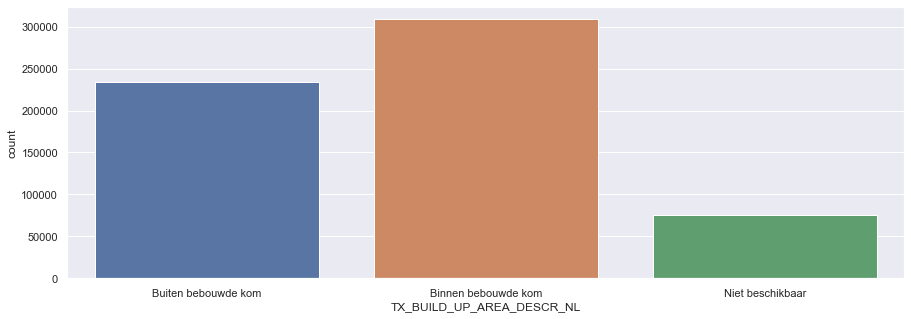

In [31]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.countplot(df_accidents['TX_BUILD_UP_AREA_DESCR_NL'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
fig = ax.get_figure()
fig.savefig('area.png', dpi=300)

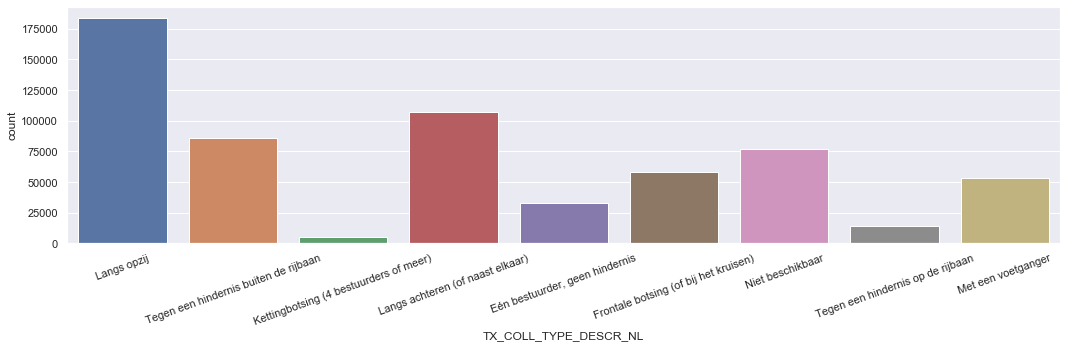

In [32]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.countplot(df_accidents['TX_COLL_TYPE_DESCR_NL'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=20)
plt.tight_layout()
fig = ax.get_figure()
fig.savefig('collision_type.png', dpi=300)

In [33]:
os.getcwd()

'D:\\GitHub\\Road_accidents_Belgium\\Plots'

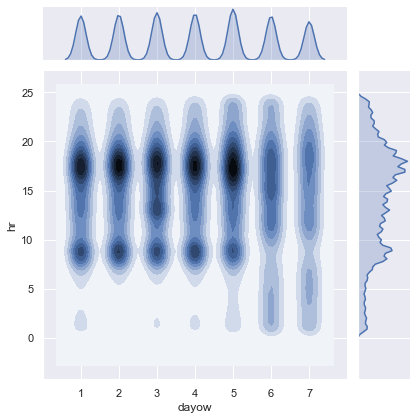

In [34]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.jointplot(x='dayow', y='hr',data=df_accidents,kind="kde")


In [35]:
ax.savefig('joint_plot_dayow_hr.png', dpi=300)

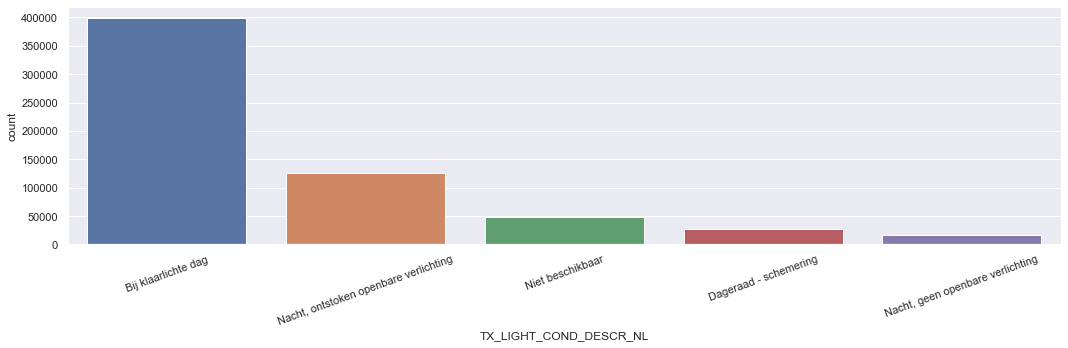

In [36]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.countplot(df_accidents['TX_LIGHT_COND_DESCR_NL'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=20)
plt.tight_layout()
fig = ax.get_figure()
fig.savefig('light_condition.png', dpi=300)

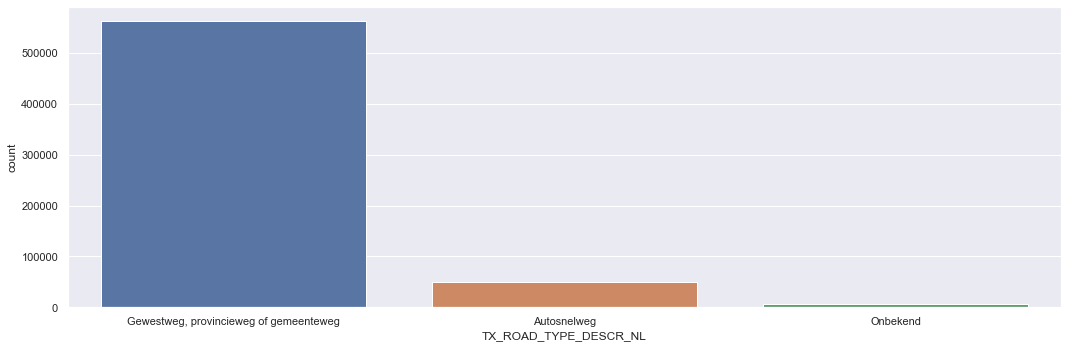

In [37]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.countplot(df_accidents['TX_ROAD_TYPE_DESCR_NL'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.tight_layout()
fig = ax.get_figure()
fig.savefig('road_type.png', dpi=300)

In [38]:
os.chdir('D:\\GitHub\\Road_accidents_Belgium\\Accidents')

In [39]:
os.getcwd()

'D:\\GitHub\\Road_accidents_Belgium\\Accidents'

In [40]:
# TX_DAY_OF_WEEK_DESCR_NL = dow(numerical)
df_accidents = df_accidents.drop('TX_DAY_OF_WEEK_DESCR_NL',axis=1)

In [41]:
df_accidents['TX_BUILD_UP_AREA_DESCR_NL'].value_counts()

Binnen bebouwde kom    308553
Buiten bebouwde kom    234484
Niet beschikbaar        74935
Name: TX_BUILD_UP_AREA_DESCR_NL, dtype: int64

In [42]:
df_accidents['CD_BUILD_UP_AREA'].value_counts()

1.0    308553
2.0    234484
Name: CD_BUILD_UP_AREA, dtype: int64

In [43]:
#where did "not available" (Niet beschikbaar) go?

In [44]:
df_accidents['CD_BUILD_UP_AREA'].isnull().sum()

74935

In [45]:
#replace nan's with 3.0
df_accidents["CD_BUILD_UP_AREA"].fillna(3.0, inplace = True) 

In [46]:
df_accidents['CD_BUILD_UP_AREA'].value_counts()

#1.0 = Binnen bebouwde kom (in residential area)
#2.0 = Buiten bebouwde kom (outside built-up areas)
#3.0 = Niet beschikbaar (not available)


1.0    308553
2.0    234484
3.0     74935
Name: CD_BUILD_UP_AREA, dtype: int64

In [47]:
#remove text column 
df_accidents = df_accidents.drop('TX_BUILD_UP_AREA_DESCR_NL',axis=1)

In [48]:
df_accidents.head(4)

,CD_BUILD_UP_AREA,CD_COLL_TYPE,TX_COLL_TYPE_DESCR_NL,CD_LIGHT_COND,TX_LIGHT_COND_DESCR_NL,CD_ROAD_TYPE,TX_ROAD_TYPE_DESCR_NL,CD_MUNTY_REFNIS,TX_MUNTY_DESCR_NL,CD_DSTR_REFNIS,...,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,MS_ACCT_WITH_MORY_INJ,MS_ACCT_WITH_SERLY_INJ,MS_ACCT_WITH_SLY_INJ,month,year,quarter,dayow,hr
0,2.0,4.0,Langs opzij,1.0,Bij klaarlichte dag,2.0,"Gewestweg, provincieweg of gemeenteweg",11001,Aartselaar,11000,...,0,0,0,0,1,1,2005,1,2,10
1,1.0,4.0,Langs opzij,1.0,Bij klaarlichte dag,2.0,"Gewestweg, provincieweg of gemeenteweg",11001,Aartselaar,11000,...,0,0,0,0,1,1,2005,1,3,16
2,1.0,4.0,Langs opzij,1.0,Bij klaarlichte dag,2.0,"Gewestweg, provincieweg of gemeenteweg",11001,Aartselaar,11000,...,0,0,0,0,1,1,2005,1,2,16
3,1.0,7.0,Tegen een hindernis buiten de rijbaan,3.0,"Nacht, ontstoken openbare verlichting",2.0,"Gewestweg, provincieweg of gemeenteweg",11001,Aartselaar,11000,...,0,0,0,0,1,1,2005,1,2,24


In [49]:
df_accidents['CD_COLL_TYPE'].value_counts()

4.0    183703
3.0    107443
7.0     85647
2.0     58302
5.0     53409
8.0     32920
6.0     14049
1.0      5637
Name: CD_COLL_TYPE, dtype: int64

In [50]:
df_accidents['TX_COLL_TYPE_DESCR_NL'].value_counts()

Langs opzij                               183703
Langs achteren (of naast elkaar)          107443
Tegen een hindernis buiten de rijbaan      85647
Niet beschikbaar                           76862
Frontale botsing (of bij het kruisen)      58302
Met een voetganger                         53409
Eén bestuurder, geen hindernis             32920
Tegen een hindernis op de rijbaan          14049
Kettingbotsing (4 bestuurders of meer)      5637
Name: TX_COLL_TYPE_DESCR_NL, dtype: int64

In [51]:
# 1.0 = Kettingbotsing (4 bestuurders of meer)      5637
# 2.0 = Frontale botsing (of bij het kruisen)      58302
# 3.0 = Langs achteren (of naast elkaar)          107443
# 4.0 = Langs opzij                               183703
# 5.0 = Met een voetganger                         53409
# 6.0 = Tegen een hindernis op de rijbaan          14049
# 7.0 = Tegen een hindernis buiten de rijbaan      85647

In [52]:
#remove text column 
df_accidents = df_accidents.drop('TX_COLL_TYPE_DESCR_NL',axis=1)

In [53]:
df_accidents.head(4)

,CD_BUILD_UP_AREA,CD_COLL_TYPE,CD_LIGHT_COND,TX_LIGHT_COND_DESCR_NL,CD_ROAD_TYPE,TX_ROAD_TYPE_DESCR_NL,CD_MUNTY_REFNIS,TX_MUNTY_DESCR_NL,CD_DSTR_REFNIS,TX_ADM_DSTR_DESCR_NL,...,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,MS_ACCT_WITH_MORY_INJ,MS_ACCT_WITH_SERLY_INJ,MS_ACCT_WITH_SLY_INJ,month,year,quarter,dayow,hr
0,2.0,4.0,1.0,Bij klaarlichte dag,2.0,"Gewestweg, provincieweg of gemeenteweg",11001,Aartselaar,11000,Arrondissement Antwerpen,...,0,0,0,0,1,1,2005,1,2,10
1,1.0,4.0,1.0,Bij klaarlichte dag,2.0,"Gewestweg, provincieweg of gemeenteweg",11001,Aartselaar,11000,Arrondissement Antwerpen,...,0,0,0,0,1,1,2005,1,3,16
2,1.0,4.0,1.0,Bij klaarlichte dag,2.0,"Gewestweg, provincieweg of gemeenteweg",11001,Aartselaar,11000,Arrondissement Antwerpen,...,0,0,0,0,1,1,2005,1,2,16
3,1.0,7.0,3.0,"Nacht, ontstoken openbare verlichting",2.0,"Gewestweg, provincieweg of gemeenteweg",11001,Aartselaar,11000,Arrondissement Antwerpen,...,0,0,0,0,1,1,2005,1,2,24


In [54]:
df_accidents['TX_LIGHT_COND_DESCR_NL'].value_counts()

Bij klaarlichte dag                      398885
Nacht, ontstoken openbare verlichting    126694
Niet beschikbaar                          48992
Dageraad - schemering                     27415
Nacht, geen openbare verlichting          15986
Name: TX_LIGHT_COND_DESCR_NL, dtype: int64

In [55]:
df_accidents['CD_LIGHT_COND'].value_counts()

1.0    398885
3.0    126694
2.0     27415
4.0     15986
Name: CD_LIGHT_COND, dtype: int64

In [56]:
#5.0 is missing "not available" (Niet beschikbaar) 

In [57]:
#replace nan's with 5.0
df_accidents['CD_LIGHT_COND'].fillna(5.0, inplace = True) 

In [58]:
df_accidents['CD_LIGHT_COND'].value_counts()

1.0    398885
3.0    126694
5.0     48992
2.0     27415
4.0     15986
Name: CD_LIGHT_COND, dtype: int64

In [59]:
# Bij klaarlichte dag                      398885
# Nacht, ontstoken openbare verlichting    126694
# Niet beschikbaar                          48992
# Dageraad - schemering                     27415
# Nacht, geen openbare verlichting          15986

# 1.0    398885
# 3.0    126694
# 5.0     48992
# 2.0     27415
# 4.0     15986

In [60]:
#remove text column 
df_accidents = df_accidents.drop('TX_LIGHT_COND_DESCR_NL',axis=1)

In [61]:
df_accidents.head(2)

,CD_BUILD_UP_AREA,CD_COLL_TYPE,CD_LIGHT_COND,CD_ROAD_TYPE,TX_ROAD_TYPE_DESCR_NL,CD_MUNTY_REFNIS,TX_MUNTY_DESCR_NL,CD_DSTR_REFNIS,TX_ADM_DSTR_DESCR_NL,CD_PROV_REFNIS,...,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,MS_ACCT_WITH_MORY_INJ,MS_ACCT_WITH_SERLY_INJ,MS_ACCT_WITH_SLY_INJ,month,year,quarter,dayow,hr
0,2.0,4.0,1.0,2.0,"Gewestweg, provincieweg of gemeenteweg",11001,Aartselaar,11000,Arrondissement Antwerpen,10000.0,...,0,0,0,0,1,1,2005,1,2,10
1,1.0,4.0,1.0,2.0,"Gewestweg, provincieweg of gemeenteweg",11001,Aartselaar,11000,Arrondissement Antwerpen,10000.0,...,0,0,0,0,1,1,2005,1,3,16


In [62]:
df_accidents['TX_ROAD_TYPE_DESCR_NL'].value_counts()

Gewestweg, provincieweg of gemeenteweg    562714
Autosnelweg                                49269
Onbekend                                    5989
Name: TX_ROAD_TYPE_DESCR_NL, dtype: int64

In [63]:
df_accidents['CD_ROAD_TYPE'].value_counts()

2.0    562714
1.0     49269
Name: CD_ROAD_TYPE, dtype: int64

In [64]:
#3.0 is missing "unknown" (Onbekend) 

In [65]:
#replace nan's with 3.0
df_accidents['CD_ROAD_TYPE'].fillna(3.0, inplace = True) 

In [66]:
df_accidents['CD_ROAD_TYPE'].value_counts()

2.0    562714
1.0     49269
3.0      5989
Name: CD_ROAD_TYPE, dtype: int64

In [67]:
# Gewestweg, provincieweg of gemeenteweg    562714
# Autosnelweg                                49269
# Onbekend                                    5989

# 2.0    562714
# 1.0     49269
# 3.0      5989

In [68]:
#remove text column 
df_accidents = df_accidents.drop('TX_ROAD_TYPE_DESCR_NL',axis=1)

In [69]:
df_accidents.head(2)

,CD_BUILD_UP_AREA,CD_COLL_TYPE,CD_LIGHT_COND,CD_ROAD_TYPE,CD_MUNTY_REFNIS,TX_MUNTY_DESCR_NL,CD_DSTR_REFNIS,TX_ADM_DSTR_DESCR_NL,CD_PROV_REFNIS,TX_PROV_DESCR_NL,...,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,MS_ACCT_WITH_MORY_INJ,MS_ACCT_WITH_SERLY_INJ,MS_ACCT_WITH_SLY_INJ,month,year,quarter,dayow,hr
0,2.0,4.0,1.0,2.0,11001,Aartselaar,11000,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,...,0,0,0,0,1,1,2005,1,2,10
1,1.0,4.0,1.0,2.0,11001,Aartselaar,11000,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,...,0,0,0,0,1,1,2005,1,3,16


In [70]:
df_accidents['CD_MUNTY_REFNIS'].value_counts()

11002    34495
44021    23007
21004    16791
62063    12177
52011    10996
         ...  
23009       59
13002       56
84016       49
33016       19
73028        1
Name: CD_MUNTY_REFNIS, Length: 589, dtype: int64

In [71]:
df_accidents['TX_MUNTY_DESCR_NL'].value_counts()

Antwerpen        34495
Gent             23007
Brussel          16791
Luik             12177
Charleroi        10996
                 ...  
Bever               59
Baarle-Hertog       56
Daverdisse          49
Mesen               19
Herstappe            1
Name: TX_MUNTY_DESCR_NL, Length: 589, dtype: int64

In [72]:
df_accidents[df_accidents['TX_MUNTY_DESCR_NL']=='Overpelt']

,CD_BUILD_UP_AREA,CD_COLL_TYPE,CD_LIGHT_COND,CD_ROAD_TYPE,CD_MUNTY_REFNIS,TX_MUNTY_DESCR_NL,CD_DSTR_REFNIS,TX_ADM_DSTR_DESCR_NL,CD_PROV_REFNIS,TX_PROV_DESCR_NL,...,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,MS_ACCT_WITH_MORY_INJ,MS_ACCT_WITH_SERLY_INJ,MS_ACCT_WITH_SLY_INJ,month,year,quarter,dayow,hr
36640,2.0,4.0,1.0,2.0,72029,Overpelt,72000,Arrondissement Maaseik,70000.0,Provincie Limburg,...,0,0,0,0,1,9,2005,3,4,10
36641,2.0,4.0,1.0,2.0,72029,Overpelt,72000,Arrondissement Maaseik,70000.0,Provincie Limburg,...,1,1,0,0,0,3,2005,1,1,8
36642,2.0,2.0,4.0,2.0,72029,Overpelt,72000,Arrondissement Maaseik,70000.0,Provincie Limburg,...,0,0,0,1,0,9,2005,3,3,6
36643,2.0,4.0,1.0,2.0,72029,Overpelt,72000,Arrondissement Maaseik,70000.0,Provincie Limburg,...,0,0,0,1,0,9,2005,3,3,14
36644,2.0,4.0,3.0,2.0,72029,Overpelt,72000,Arrondissement Maaseik,70000.0,Provincie Limburg,...,0,0,0,0,1,1,2005,1,4,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29295,1.0,4.0,1.0,2.0,72029,Overpelt,72000,Arrondissement Maaseik,70000.0,Provincie Limburg,...,0,0,0,1,0,9,2018,3,4,17
29296,2.0,8.0,1.0,2.0,72029,Overpelt,72000,Arrondissement Maaseik,70000.0,Provincie Limburg,...,0,0,0,0,1,9,2018,3,3,19
29297,2.0,8.0,1.0,2.0,72029,Overpelt,72000,Arrondissement Maaseik,70000.0,Provincie Limburg,...,0,0,0,0,1,9,2018,3,3,17
29298,2.0,7.0,1.0,2.0,72029,Overpelt,72000,Arrondissement Maaseik,70000.0,Provincie Limburg,...,0,0,0,0,1,8,2018,3,3,14


Explore REFNIS

https://en.wikipedia.org/wiki/Provinces_of_Belgium
The country of Belgium is divided into three regions. Two of these regions, the Flemish Region or Flanders, and Walloon Region, or Wallonia, are each subdivided into five provinces. The third region, the Brussels-Capital Region, is not divided into provinces, as it was originally only a small part of a province itself. 

https://nl.wikipedia.org/wiki/NIS-code
De NIS-code (Frans: code INS) is een alfanumerieke code voor geografische gebieden die toegepast wordt voor statistische verwerkingen in België. Deze code werd in het midden van de jaren 60 ontwikkeld door het Nationaal Instituut voor de Statistiek (NIS) (nu Statbel).


https://statbel.fgov.be/nl/open-data/refnis-code
België is ingedeeld volgens een hiërarchisch systeem dat de Fransen in 1796 ingevoerd hebben. De administratieve indeling gebeurt aan de hand van vier territoriale eenheden: gewesten, provincies, bestuurlijke arrondissementen en gemeenten. De gemeenten zijn de basis-eenheden, dit wil zeggen dat elke territoriale eenheid op een hoger niveau uit verschillende gemeenten bestaat.
Structuur

    Level 1: 3 gewesten
    Level 2: 10 provincies
    Level 3: 43 bestuurlijke arrondissementen
    Level 4: 581 gemeenten (589 tot 31/12/2018) --- sanity check: length of CD_MUNTY_REFNIS also 589
    Level 5: Deelgemeenten
    Level 7: Statistische sectoren

https://nl.wikipedia.org/wiki/Arrondissement
Een arrondissement is een onderdeel van het grondgebied van de staat, dat wordt opgedeeld om administratieve of bestuurlijke redenen. Elk arrondissement is een ambtsgebied van colleges en ambtenaren (werkzaam voor een overheid). Het komt oorspronkelijk uit het Frans en betekent letterlijk afronding. 

https://nl.wikipedia.org/wiki/Deelgemeente_(Belgi%C3%AB)
Een deelgemeente is in België het grondgebied van de voormalige gemeenten die vóór de grote gemeentelijke herindelingen in de jaren 1960-'70 nog zelfstandig waren

In [73]:
#Found REFNIS file on https://statbel.fgov.be/nl/over-statbel/methodologie/classificaties/geografie

In [74]:
os.chdir('D:\\GitHub\\Road_accidents_Belgium\\Geoplot')

In [75]:
os.getcwd()

'D:\\GitHub\\Road_accidents_Belgium\\Geoplot'

In [76]:
df_refnis = pd.read_excel('refnis.xlsx')

In [77]:
#df_refnis

In [78]:
#remove french columns
df_refnis = df_refnis.drop(['Code INS','Entités administratives','Langue'], axis=1)

In [79]:
df_refnis

,Code NIS,Administratieve eenheden,Taal
0,1000,HET RIJK,NaN
1,4000,BRUSSELS HOOFDSTEDELIJK GEWEST,NaN
2,21000,Arrondissement Brussel Hoofdstad,NaN
3,21001,Anderlecht,NaN
4,21002,Oudergem,NF
...,...,...,...
641,93018,Doische,F
642,93022,Florennes,F
643,93056,Philippeville,F
644,93090,Viroinval,F


In [219]:
df_refnis[df_refnis['Code NIS']==21005]

,Code NIS,Administratieve eenheden,Taal
7,21005,Etterbeek,NF


how to plot a map?

Geopandas:
https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

Sources:

1) http://www.geopunt.be/download?container=referentiebestand-gemeenten&title=Voorlopig%20referentiebestand%20gemeentegrenzen# (shapefiles of only Flanders)


2) https://www.geo.be/#!/catalog/details/9738c7c0-5255-11ea-8895-34e12d0f0423?l=nl (postal codes of Belgium)


3) https://www.eea.europa.eu/data-and-maps/data/eea-reference-grids-2/gis-files/belgium-shapefile

4) https://hub.arcgis.com/datasets/esribeluxdata::belgium-municipalities




In [80]:
import geopandas as gpd

In [81]:
#Explore source 1)

# set the filepath and load in a shapefile
#gewesten
gew = "D:\\GitHub\\Road_accidents_Belgium\\Geoplot\\Shapefiles\\GewVLA_Shape\\Shapefile\\Refgew.shp"
#provincies
prv = "D:\\GitHub\\Road_accidents_Belgium\\Geoplot\\Shapefiles\\GewVLA_Shape\\Shapefile\\Refprv.shp"
#gemeentes
gem = "D:\\GitHub\\Road_accidents_Belgium\\Geoplot\\Shapefiles\\GewVLA_Shape\\Shapefile\\Refgem.shp"
#rarrondisementen
arr = "D:\\GitHub\\Road_accidents_Belgium\\Geoplot\\Shapefiles\\GewVLA_Shape\\Shapefile\\Refarr.shp"

In [82]:
map_gew = gpd.read_file(gew)
map_prv = gpd.read_file(prv)
map_gem = gpd.read_file(gem)
map_arr = gpd.read_file(arr)

In [83]:
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
# had to install descartes in anaconda environment to make this work

map_gew.head() 

,OIDN,UIDN,VERSDATUM,TERRID,NAAM,NISCODE,NUTS1,LENGTE,OPPERVL,geometry
0,1.0,5.0,1900-01-01,363,Vlaams Gewest,02000,BE2,1.117979e+06,1.362443e+10,"MULTIPOLYGON (((249282.040 164471.980, 249391...."


In [84]:
map_prv.head(5) 

,OIDN,UIDN,VERSDATUM,TERRID,NAAM,NISCODE,NUTS2,LENGTE,OPPERVL,geometry
0,3.0,14.0,1900-01-01,351,West-Vlaanderen,30000,BE25,357355.234143,3.195333e+09,"POLYGON ((80190.818 229279.736, 80661.880 2283..."
1,1.0,16.0,1900-01-01,355,Limburg,70000,BE22,398154.712668,2.427390e+09,"MULTIPOLYGON (((249391.320 164162.500, 249441...."
2,5.0,17.0,1900-01-01,356,Oost-Vlaanderen,40000,BE23,404435.267361,3.007239e+09,"POLYGON ((145735.167 220358.330, 146413.212 21..."
3,2.0,12.0,1900-01-01,357,Antwerpen,10000,BE21,408784.745097,2.876065e+09,"MULTIPOLYGON (((189455.470 233440.400, 189492...."
4,4.0,13.0,1900-01-01,359,Vlaams Brabant,20001,BE24,508725.993612,2.118401e+09,"POLYGON ((200484.928 193540.964, 200493.393 19..."


In [85]:
map_gem.head(4) 

,OIDN,UIDN,VERSDATUM,TERRID,NISCODE,NAAM,DATPUBLBS,NUMAC,LENGTE,OPPERVL,geometry
0,278.0,727.0,1900-01-01,1,13001,Arendonk,1976-01-23,1975123003,32356.181109,5.500452e+07,"POLYGON ((203378.850 223128.860, 203380.195 22..."
1,209.0,517.0,1900-01-01,2,13031,Oud-Turnhout,1982-12-29,1982001920,33491.154251,3.917071e+07,"POLYGON ((191896.098 228261.046, 191910.672 22..."
2,67.0,655.0,1900-01-01,3,13025,Mol,1831-02-07,None,78267.605938,1.145177e+08,"POLYGON ((210668.234 217185.608, 210616.966 21..."
3,53.0,648.0,1900-01-01,4,72037,Hamont-Achel,1976-01-23,1975123003,32003.091789,4.373476e+07,"POLYGON ((229442.220 221344.470, 230005.370 22..."


In [86]:
map_arr.head() 

,OIDN,UIDN,VERSDATUM,TERRID,NAAM,NISCODE,NUTS3,LENGTE,OPPERVL,geometry
0,21.0,56.0,1900-01-01,321,Veurne,38000,BE258,106420.535232,2.876914e+08,"POLYGON ((36685.695 206508.313, 36666.656 2064..."
1,18.0,46.0,1900-01-01,322,Oostende,35000,BE255,121744.287143,3.041164e+08,"POLYGON ((62472.289 222032.484, 62446.448 2220..."
2,17.0,53.0,1900-01-01,323,Brugge,31000,BE251,154622.378888,6.728748e+08,"POLYGON ((80190.818 229279.736, 80661.880 2283..."
3,3.0,29.0,1900-01-01,324,Diksmuide,32000,BE252,119231.974793,3.650620e+08,"POLYGON ((49324.797 203062.453, 49393.434 2028..."
4,2.0,54.0,1900-01-01,325,Ieper,33000,BE253,178629.119880,5.537450e+08,"POLYGON ((36143.933 184181.484, 36200.820 1841..."


In [87]:
len(map_gew['NISCODE'])

1

In [88]:
len(map_prv['NISCODE'])

5

In [89]:
len(map_gem['NISCODE']) #300 municipalities in Flanders

300

In [90]:
len(map_arr['NISCODE'])

22

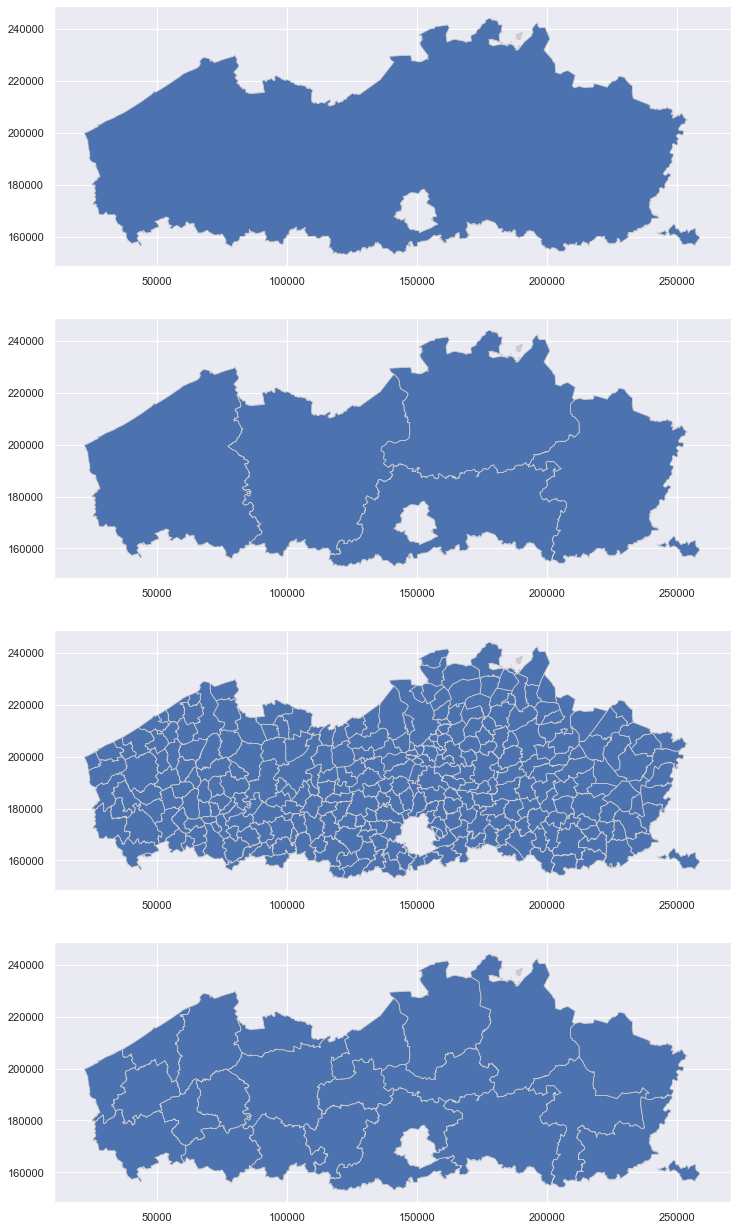

In [91]:
# Create four polar axes and access them through the returned array
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(20,22))
ax1 = map_gew.plot(linewidth=0.8, ax=ax1, edgecolor='0.8')
ax2 = map_prv.plot(linewidth=0.8, ax=ax2, edgecolor='0.8')
ax3 = map_gem.plot(linewidth=0.8, ax=ax3, edgecolor='0.8')
ax4 = map_arr.plot(linewidth=0.8, ax=ax4, edgecolor='0.8')

In [92]:
#Explore source 2)

# set the filepath and load in a shapefile

postal_code = "D:\\GitHub\\Road_accidents_Belgium\\Geoplot\\Geodotbe\\3812\\postaldistricts.shp"


In [93]:
map_postal_code = gpd.read_file(postal_code)

In [94]:
map_postal_code.head()

,Join_Count,nouveau_PO,FREQUENCY,CP_speciau,Shape_Leng,Shape_Area,geometry
0,1,5012,2,1,977.714223,3.838034e+04,"POLYGON Z ((685645.150 628039.549 0.000, 68569..."
1,1,5012,2,1,123.021423,8.601421e+02,"POLYGON Z ((685789.894 628275.337 0.000, 68578..."
2,1,5589,1,1,1197.205234,6.306885e+04,"POLYGON Z ((713828.210 594567.550 0.000, 71415..."
3,1094,5560,2,0,54736.127330,5.406061e+07,"POLYGON Z ((691357.659 601352.353 0.000, 69137..."
4,1357,5370,1,0,74754.001683,8.154068e+07,"POLYGON Z ((710598.535 623267.261 0.000, 71118..."


In [95]:
map_postal_code['nouveau_PO'].value_counts()

2387    23
1000     5
4650     4
9400     3
1701     3
        ..
4280     1
8430     1
4728     1
2860     1
7823     1
Name: nouveau_PO, Length: 1187, dtype: int64

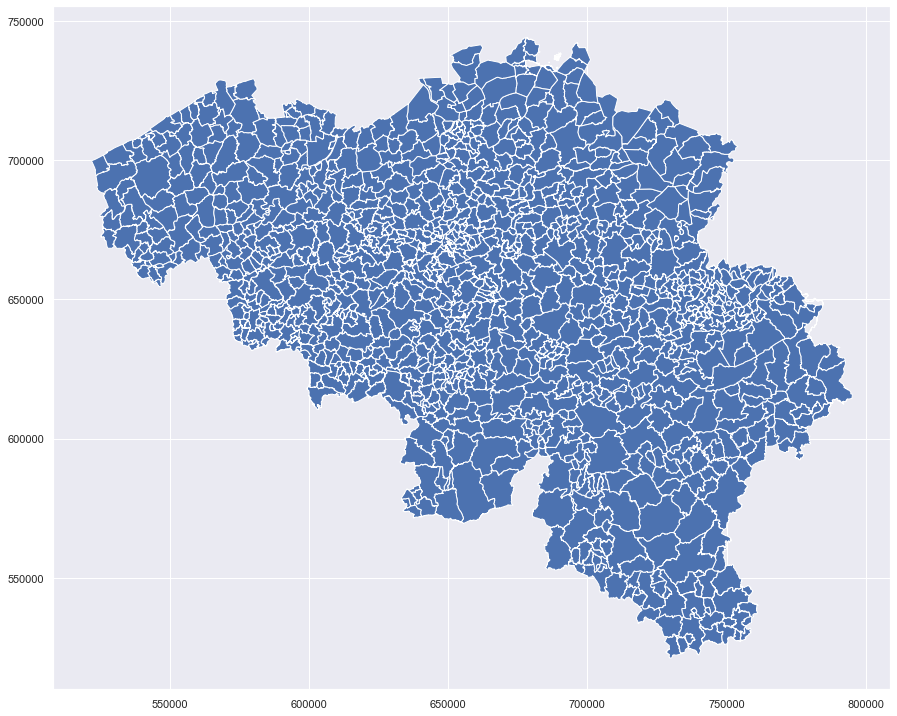

In [96]:
fig, ax = plt.subplots(1, figsize=(15, 15))
map_postal_code.plot(ax=ax)

In [97]:
#Explore source 3)

eea = "D:\\GitHub\\Road_accidents_Belgium\\Geoplot\\Eea\\be_10km.shp"

In [98]:
map_eea = gpd.read_file(eea)

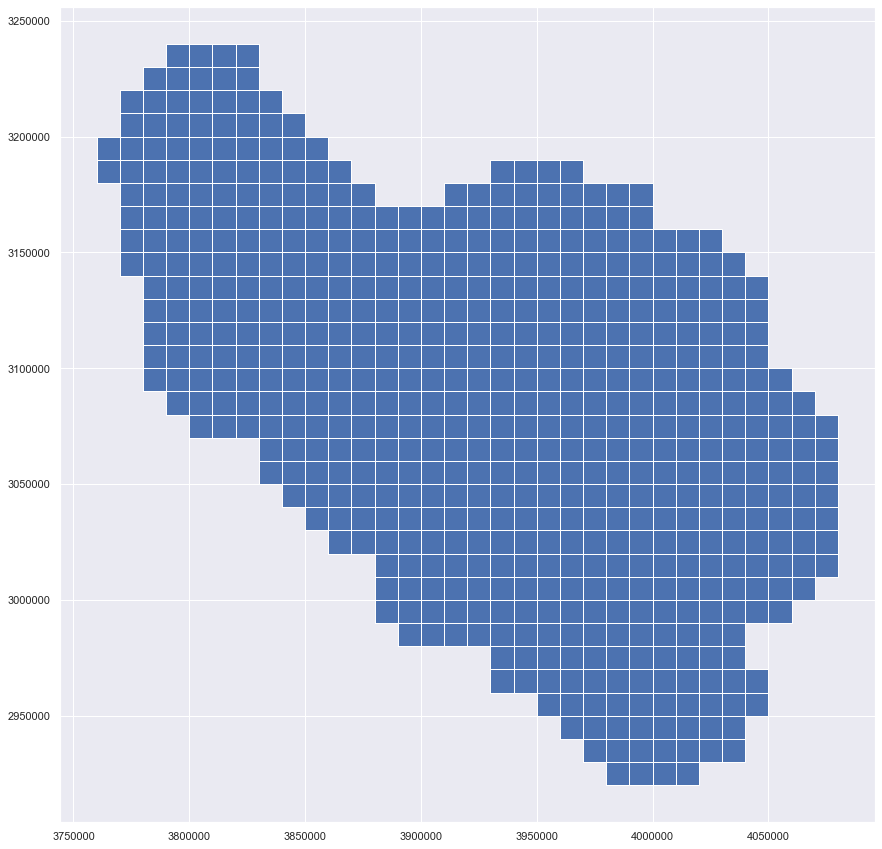

In [99]:
fig, ax = plt.subplots(1, figsize=(15, 15))
map_eea.plot(ax=ax)

In [100]:
#Explore source 4)

arcgis_mun = "D:\\GitHub\\Road_accidents_Belgium\\Geoplot\\Arcgis\\municipalities\\bemun.shp"
arcgis_prov = "D:\\GitHub\\Road_accidents_Belgium\\Geoplot\\Arcgis\\provinces\\provinces.shp"


In [101]:
map_arcgis_mun = gpd.read_file(arcgis_mun)
map_arcgis_prov = gpd.read_file(arcgis_prov)

In [102]:
map_arcgis_mun.head()

,OBJECTID,ADMUNAFR,ADMUNADU,ADMUNAGE,Communes,CODE_INS,arrond,geometry
0,1,AARTSELAAR,AARTSELAAR,AARTSELAAR,Aartselaar,11001,11,"POLYGON ((4.40125 51.14814, 4.40114 51.14797, ..."
1,2,ANVERS,ANTWERPEN,ANTWERPEN,Antwerpen,11002,11,"POLYGON ((4.34109 51.35766, 4.34112 51.35760, ..."
2,3,BOECHOUT,BOECHOUT,BOECHOUT,Boechout,11004,11,"POLYGON ((4.52882 51.19051, 4.52971 51.19020, ..."
3,4,BOOM,BOOM,BOOM,Boom,11005,11,"POLYGON ((4.36411 51.10597, 4.36456 51.10596, ..."
4,5,BORSBEEK,BORSBEEK,BORSBEEK,Borsbeek,11007,11,"POLYGON ((4.48350 51.20315, 4.48354 51.20314, ..."


In [103]:
map_arcgis_prov.head()

,OBJECTID,CodeINS,NAME_2,FIRST_NAME,FIRST_VARN,FIRST_ENGT,FR_Name,NE_Name,geometry
0,1,10000,Antwerpen,Vlaanderen,Amberes|AntuÃ©rpia|Antwerp|Anvers|Anversa,Province,Anvers,Antwerpen,"MULTIPOLYGON (((4.94209 51.45524, 4.94062 51.4..."
1,2,4000,Bruxelles,Bruxelles,Brussel Hoofstadt|Brusselse Hoofdstedelijke Ge...,Capital Region,Bruxelles,Brussel,"POLYGON ((4.40633 50.91309, 4.40722 50.91295, ..."
2,3,20001,Vlaams Brabant,Vlaanderen,Brabant Flamand|Brabante Flamenco|Brabante Fla...,Province,Brabant Flamand,Vlaams Brabant,"POLYGON ((3.98787 50.68749, 3.98772 50.68749, ..."
3,4,20002,Brabant Wallon,Wallonie,Waals Brabant|Walloon Brabant|Brabante Val?o,Province,Brabant Wallon,Waals Brabant,"POLYGON ((4.75386 50.80639, 4.75387 50.80639, ..."
4,5,30000,West-Vlaanderen,Vlaanderen,Fiandra Occidentale|Flandes Occidental|Flandre...,Province,Flandre Occidentale,West-Vlaanderen,"MULTIPOLYGON (((2.65679 51.12932, 2.65663 51.1..."


In [104]:
len(map_arcgis_mun['CODE_INS'])

589

In [105]:
len(map_arcgis_prov['NE_Name'])

11

Nice! Arcgis got the geometry of all 589 municipalities in Belgium.
So 4) it is.

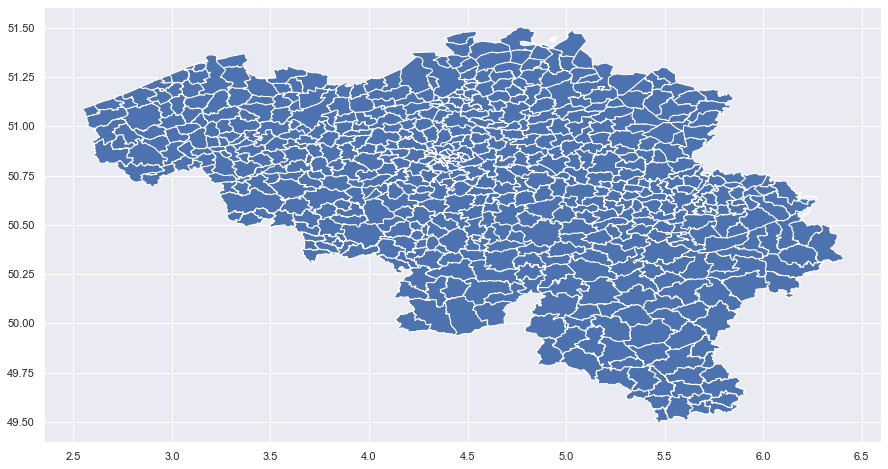

In [106]:
fig, ax = plt.subplots(1, figsize=(15,15))
map_arcgis_mun.plot(ax=ax)

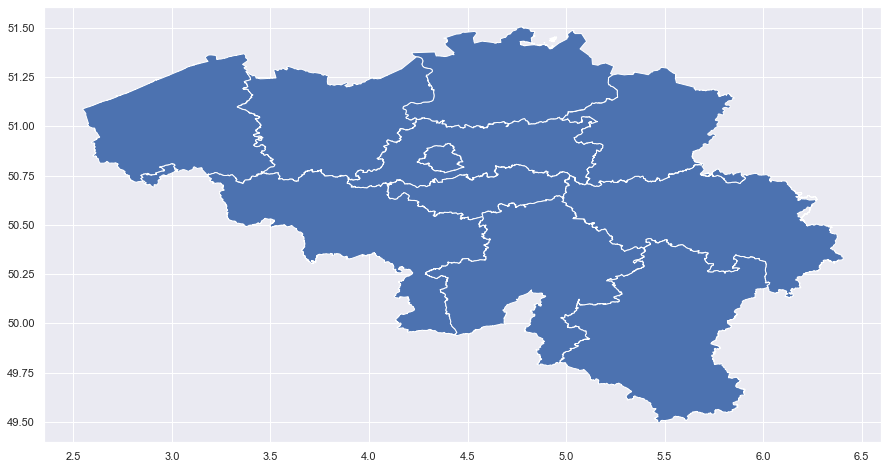

In [107]:
fig, ax = plt.subplots(1, figsize=(15,15))
map_arcgis_prov.plot(ax=ax)

In [108]:
df_accidents.head()

,CD_BUILD_UP_AREA,CD_COLL_TYPE,CD_LIGHT_COND,CD_ROAD_TYPE,CD_MUNTY_REFNIS,TX_MUNTY_DESCR_NL,CD_DSTR_REFNIS,TX_ADM_DSTR_DESCR_NL,CD_PROV_REFNIS,TX_PROV_DESCR_NL,...,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,MS_ACCT_WITH_MORY_INJ,MS_ACCT_WITH_SERLY_INJ,MS_ACCT_WITH_SLY_INJ,month,year,quarter,dayow,hr
0,2.0,4.0,1.0,2.0,11001,Aartselaar,11000,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,...,0,0,0,0,1,1,2005,1,2,10
1,1.0,4.0,1.0,2.0,11001,Aartselaar,11000,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,...,0,0,0,0,1,1,2005,1,3,16
2,1.0,4.0,1.0,2.0,11001,Aartselaar,11000,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,...,0,0,0,0,1,1,2005,1,2,16
3,1.0,7.0,3.0,2.0,11001,Aartselaar,11000,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,...,0,0,0,0,1,1,2005,1,2,24
4,2.0,4.0,3.0,2.0,11001,Aartselaar,11000,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,...,0,0,0,0,1,1,2005,1,2,19


Now that we have the geoplot data for the REFNIS, let's remove the alpha representation

In [109]:
df_accidents = df_accidents.drop('TX_MUNTY_DESCR_NL',axis=1)

In [110]:
df_accidents.head()

,CD_BUILD_UP_AREA,CD_COLL_TYPE,CD_LIGHT_COND,CD_ROAD_TYPE,CD_MUNTY_REFNIS,CD_DSTR_REFNIS,TX_ADM_DSTR_DESCR_NL,CD_PROV_REFNIS,TX_PROV_DESCR_NL,CD_RGN_REFNIS,...,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,MS_ACCT_WITH_MORY_INJ,MS_ACCT_WITH_SERLY_INJ,MS_ACCT_WITH_SLY_INJ,month,year,quarter,dayow,hr
0,2.0,4.0,1.0,2.0,11001,11000,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,2000,...,0,0,0,0,1,1,2005,1,2,10
1,1.0,4.0,1.0,2.0,11001,11000,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,2000,...,0,0,0,0,1,1,2005,1,3,16
2,1.0,4.0,1.0,2.0,11001,11000,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,2000,...,0,0,0,0,1,1,2005,1,2,16
3,1.0,7.0,3.0,2.0,11001,11000,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,2000,...,0,0,0,0,1,1,2005,1,2,24
4,2.0,4.0,3.0,2.0,11001,11000,Arrondissement Antwerpen,10000.0,Provincie Antwerpen,2000,...,0,0,0,0,1,1,2005,1,2,19


In [111]:
df_accidents['CD_DSTR_REFNIS'].value_counts()

11000    64214
21000    53545
44000    41015
62000    31891
23000    28897
71000    27516
13000    25591
31000    23720
24000    23497
52000    21062
46000    17965
34000    17964
12000    17604
25000    17319
41000    16649
92000    15248
63000    13843
42000    12744
72000    12615
35000     9934
73000     9858
53000     9749
36000     8707
55000     8044
57000     7511
56000     6988
45000     6880
43000     6501
33000     6172
91000     6076
61000     5659
37000     4617
38000     4519
51000     4082
93000     4079
83000     3883
84000     3819
64000     3566
54000     3444
81000     2869
32000     2854
82000     2840
85000     2422
Name: CD_DSTR_REFNIS, dtype: int64

In [112]:
df_accidents['TX_ADM_DSTR_DESCR_NL'].value_counts()

Arrondissement Antwerpen            64214
Arrondissement Brussel-Hoofdstad    53545
Arrondissement Gent                 41015
Arrondissement Luik                 31891
Arrondissement Halle-Vilvoorde      28897
Arrondissement Hasselt              27516
Arrondissement Turnhout             25591
Arrondissement Brugge               23720
Arrondissement Leuven               23497
Arrondissement Charleroi            21062
Arrondissement Sint-Niklaas         17965
Arrondissement Kortrijk             17964
Arrondissement Mechelen             17604
Arrondissement Nijvel               17319
Arrondissement Aalst                16649
Arrondissement Namen                15248
Arrondissement Verviers             13843
Arrondissement Dendermonde          12744
Arrondissement Maaseik              12615
Arrondissement Oostende              9934
Arrondissement Tongeren              9858
Arrondissement Bergen                9749
Arrondissement Roeselare             8707
Arrondissement Zinnik             

In [113]:
# 11000    64214
# 21000    53545
# 44000    41015
# 62000    31891
# 23000    28897
# 71000    27516
# 13000    25591
# 31000    23720
# 24000    23497
# 52000    21062
# 46000    17965
# 34000    17964
# 12000    17604
# 25000    17319
# 41000    16649
# 92000    15248
# 63000    13843
# 42000    12744
# 72000    12615
# 35000     9934
# 73000     9858
# 53000     9749
# 36000     8707
# 55000     8044
# 57000     7511
# 56000     6988
# 45000     6880
# 43000     6501
# 33000     6172
# 91000     6076
# 61000     5659
# 37000     4617
# 38000     4519
# 51000     4082
# 93000     4079
# 83000     3883
# 84000     3819
# 64000     3566
# 54000     3444
# 81000     2869
# 32000     2854
# 82000     2840
# 85000     2422

# Arrondissement Antwerpen            64214
# Arrondissement Brussel-Hoofdstad    53545
# Arrondissement Gent                 41015
# Arrondissement Luik                 31891
# Arrondissement Halle-Vilvoorde      28897
# Arrondissement Hasselt              27516
# Arrondissement Turnhout             25591
# Arrondissement Brugge               23720
# Arrondissement Leuven               23497
# Arrondissement Charleroi            21062
# Arrondissement Sint-Niklaas         17965
# Arrondissement Kortrijk             17964
# Arrondissement Mechelen             17604
# Arrondissement Nijvel               17319
# Arrondissement Aalst                16649
# Arrondissement Namen                15248
# Arrondissement Verviers             13843
# Arrondissement Dendermonde          12744
# Arrondissement Maaseik              12615
# Arrondissement Oostende              9934
# Arrondissement Tongeren              9858
# Arrondissement Bergen                9749
# Arrondissement Roeselare             8707
# Arrondissement Zinnik                8044
# Arrondissement Doornik               7511
# Arrondissement Thuin                 6988
# Arrondissement Oudenaarde            6880
# Arrondissement Eeklo                 6501
# Arrondissement Ieper                 6172
# Arrondissement Dinant                6076
# Arrondissement Hoei                  5659
# Arrondissement Tielt                 4617
# Arrondissement Veurne                4519
# Arrondissement Aat                   4082
# Arrondissement Philippeville         4079
# Arrondissement Marche-en-Famenne     3883
# Arrondissement Neufchâteau           3819
# Arrondissement Borgworm              3566
# Arrondissement Moeskroen             3444
# Arrondissement Aarlen                2869
# Arrondissement Diksmuide             2854
# Arrondissement Bastenaken            2840
# Arrondissement Virton                2422

In [114]:
df_accidents = df_accidents.drop('TX_ADM_DSTR_DESCR_NL',axis=1)

In [115]:
df_accidents.head()

,CD_BUILD_UP_AREA,CD_COLL_TYPE,CD_LIGHT_COND,CD_ROAD_TYPE,CD_MUNTY_REFNIS,CD_DSTR_REFNIS,CD_PROV_REFNIS,TX_PROV_DESCR_NL,CD_RGN_REFNIS,TX_RGN_DESCR_NL,...,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,MS_ACCT_WITH_MORY_INJ,MS_ACCT_WITH_SERLY_INJ,MS_ACCT_WITH_SLY_INJ,month,year,quarter,dayow,hr
0,2.0,4.0,1.0,2.0,11001,11000,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,...,0,0,0,0,1,1,2005,1,2,10
1,1.0,4.0,1.0,2.0,11001,11000,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,...,0,0,0,0,1,1,2005,1,3,16
2,1.0,4.0,1.0,2.0,11001,11000,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,...,0,0,0,0,1,1,2005,1,2,16
3,1.0,7.0,3.0,2.0,11001,11000,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,...,0,0,0,0,1,1,2005,1,2,24
4,2.0,4.0,3.0,2.0,11001,11000,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,...,0,0,0,0,1,1,2005,1,2,19


In [116]:
df_accidents = df_accidents.drop('TX_PROV_DESCR_NL',axis=1)

In [117]:
df_accidents.head()

,CD_BUILD_UP_AREA,CD_COLL_TYPE,CD_LIGHT_COND,CD_ROAD_TYPE,CD_MUNTY_REFNIS,CD_DSTR_REFNIS,CD_PROV_REFNIS,CD_RGN_REFNIS,TX_RGN_DESCR_NL,MS_ACCT,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,MS_ACCT_WITH_MORY_INJ,MS_ACCT_WITH_SERLY_INJ,MS_ACCT_WITH_SLY_INJ,month,year,quarter,dayow,hr
0,2.0,4.0,1.0,2.0,11001,11000,10000.0,2000,Vlaams Gewest,1,0,0,0,0,1,1,2005,1,2,10
1,1.0,4.0,1.0,2.0,11001,11000,10000.0,2000,Vlaams Gewest,1,0,0,0,0,1,1,2005,1,3,16
2,1.0,4.0,1.0,2.0,11001,11000,10000.0,2000,Vlaams Gewest,1,0,0,0,0,1,1,2005,1,2,16
3,1.0,7.0,3.0,2.0,11001,11000,10000.0,2000,Vlaams Gewest,1,0,0,0,0,1,1,2005,1,2,24
4,2.0,4.0,3.0,2.0,11001,11000,10000.0,2000,Vlaams Gewest,1,0,0,0,0,1,1,2005,1,2,19


In [118]:
df_accidents['CD_DSTR_REFNIS'].value_counts()

11000    64214
21000    53545
44000    41015
62000    31891
23000    28897
71000    27516
13000    25591
31000    23720
24000    23497
52000    21062
46000    17965
34000    17964
12000    17604
25000    17319
41000    16649
92000    15248
63000    13843
42000    12744
72000    12615
35000     9934
73000     9858
53000     9749
36000     8707
55000     8044
57000     7511
56000     6988
45000     6880
43000     6501
33000     6172
91000     6076
61000     5659
37000     4617
38000     4519
51000     4082
93000     4079
83000     3883
84000     3819
64000     3566
54000     3444
81000     2869
32000     2854
82000     2840
85000     2422
Name: CD_DSTR_REFNIS, dtype: int64

In [119]:
df_accidents['TX_RGN_DESCR_NL'].value_counts()

Vlaams Gewest                     390033
Waals Gewest                      174394
Brussels Hoofdstedelijk Gewest     53545
Name: TX_RGN_DESCR_NL, dtype: int64

In [120]:
# 2000    390033
# 3000    174394
# 4000     53545
# Vlaams Gewest                     390033
# Waals Gewest                      174394
# Brussels Hoofdstedelijk Gewest     53545

In [121]:
df_accidents = df_accidents.drop('TX_RGN_DESCR_NL',axis=1)

In [122]:
df_accidents.head()

,CD_BUILD_UP_AREA,CD_COLL_TYPE,CD_LIGHT_COND,CD_ROAD_TYPE,CD_MUNTY_REFNIS,CD_DSTR_REFNIS,CD_PROV_REFNIS,CD_RGN_REFNIS,MS_ACCT,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,MS_ACCT_WITH_MORY_INJ,MS_ACCT_WITH_SERLY_INJ,MS_ACCT_WITH_SLY_INJ,month,year,quarter,dayow,hr
0,2.0,4.0,1.0,2.0,11001,11000,10000.0,2000,1,0,0,0,0,1,1,2005,1,2,10
1,1.0,4.0,1.0,2.0,11001,11000,10000.0,2000,1,0,0,0,0,1,1,2005,1,3,16
2,1.0,4.0,1.0,2.0,11001,11000,10000.0,2000,1,0,0,0,0,1,1,2005,1,2,16
3,1.0,7.0,3.0,2.0,11001,11000,10000.0,2000,1,0,0,0,0,1,1,2005,1,2,24
4,2.0,4.0,3.0,2.0,11001,11000,10000.0,2000,1,0,0,0,0,1,1,2005,1,2,19


In [123]:
df_accidents['MS_ACCT'].value_counts()

1    614642
2      3239
3        80
4        10
5         1
Name: MS_ACCT, dtype: int64

In [124]:
#rename the column names

#CD_BUILD_UP_AREA = where

#1.0 = Binnen bebouwde kom (in residential area)
#2.0 = Buiten bebouwde kom (outside built-up areas)
#3.0 = Niet beschikbaar (not available)

#CD_COLL_TYPE = how

#CD_ROAD_TYPE = roadtype

# Gewestweg, provincieweg of gemeenteweg    562714
# Autosnelweg                                49269
# Onbekend                                    5989

df_accidents = df_accidents.rename(index=str, columns={'CD_BUILD_UP_AREA':'where',
                                                      'CD_COLL_TYPE':'how',
                                                      'CD_ROAD_TYPE':'typeofroad',
                                                      'CD_MUNTY_REFNIS':'refnismun',
                                                      'CD_DSTR_REFNIS':'refnisdist',
                                                      'CD_PROV_REFNIS':'refnisprov',
                                                      'CD_RGN_REFNIS':'refnisgew',
                                                      'CD_LIGHT_COND':'illumination',
                                                      'MS_ACCT_WITH_DEAD':'dead',
                                                      'MS_ACCT_WITH_DEAD_30_DAYS':'deadafter30d',
                                                      'MS_ACCT_WITH_MORY_INJ':'mortallyinjured',
                                                      'MS_ACCT_WITH_SERLY_INJ':'severelyinjured',
                                                      'MS_ACCT_WITH_SLY_INJ':'slightlyinjured',})

In [125]:
df_accidents.head()

,where,how,illumination,typeofroad,refnismun,refnisdist,refnisprov,refnisgew,MS_ACCT,dead,deadafter30d,mortallyinjured,severelyinjured,slightlyinjured,month,year,quarter,dayow,hr
0,2.0,4.0,1.0,2.0,11001,11000,10000.0,2000,1,0,0,0,0,1,1,2005,1,2,10
1,1.0,4.0,1.0,2.0,11001,11000,10000.0,2000,1,0,0,0,0,1,1,2005,1,3,16
2,1.0,4.0,1.0,2.0,11001,11000,10000.0,2000,1,0,0,0,0,1,1,2005,1,2,16
3,1.0,7.0,3.0,2.0,11001,11000,10000.0,2000,1,0,0,0,0,1,1,2005,1,2,24
4,2.0,4.0,3.0,2.0,11001,11000,10000.0,2000,1,0,0,0,0,1,1,2005,1,2,19


In [126]:
df_accidents = df_accidents.drop('MS_ACCT',axis=1)

In [127]:
df_accidents.head()

,where,how,illumination,typeofroad,refnismun,refnisdist,refnisprov,refnisgew,dead,deadafter30d,mortallyinjured,severelyinjured,slightlyinjured,month,year,quarter,dayow,hr
0,2.0,4.0,1.0,2.0,11001,11000,10000.0,2000,0,0,0,0,1,1,2005,1,2,10
1,1.0,4.0,1.0,2.0,11001,11000,10000.0,2000,0,0,0,0,1,1,2005,1,3,16
2,1.0,4.0,1.0,2.0,11001,11000,10000.0,2000,0,0,0,0,1,1,2005,1,2,16
3,1.0,7.0,3.0,2.0,11001,11000,10000.0,2000,0,0,0,0,1,1,2005,1,2,24
4,2.0,4.0,3.0,2.0,11001,11000,10000.0,2000,0,0,0,0,1,1,2005,1,2,19


EDA: Exploratory data analysis

In [128]:
%%time
#sns.pairplot(df_accidents)

Wall time: 0 ns


In [129]:
df_accidents.columns

Index(['where', 'how', 'illumination', 'typeofroad', 'refnismun', 'refnisdist',
       'refnisprov', 'refnisgew', 'dead', 'deadafter30d', 'mortallyinjured',
       'severelyinjured', 'slightlyinjured', 'month', 'year', 'quarter',
       'dayow', 'hr'],
      dtype='object')

In [130]:
df_reduced = df_accidents[['refnismun','dead']]

In [131]:
df_reduced = df_reduced.groupby(['refnismun']).sum()

In [132]:
df_reduced.head(10)

,dead
refnismun,
11001,11
11002,199
11004,6
11005,3
11007,3
11008,17
11009,35
11013,5
11016,14


In [133]:
df_reduced.reset_index(level=0, inplace=True)

In [134]:
df_reduced.head(10)

,refnismun,dead
0,11001,11
1,11002,199
2,11004,6
3,11005,3
4,11007,3
5,11008,17
6,11009,35
7,11013,5
8,11016,14
9,11018,4


In [135]:
df_reduced.nunique()

refnismun    589
dead          60
dtype: int64

In [136]:
map_arcgis_mun.head()

,OBJECTID,ADMUNAFR,ADMUNADU,ADMUNAGE,Communes,CODE_INS,arrond,geometry
0,1,AARTSELAAR,AARTSELAAR,AARTSELAAR,Aartselaar,11001,11,"POLYGON ((4.40125 51.14814, 4.40114 51.14797, ..."
1,2,ANVERS,ANTWERPEN,ANTWERPEN,Antwerpen,11002,11,"POLYGON ((4.34109 51.35766, 4.34112 51.35760, ..."
2,3,BOECHOUT,BOECHOUT,BOECHOUT,Boechout,11004,11,"POLYGON ((4.52882 51.19051, 4.52971 51.19020, ..."
3,4,BOOM,BOOM,BOOM,Boom,11005,11,"POLYGON ((4.36411 51.10597, 4.36456 51.10596, ..."
4,5,BORSBEEK,BORSBEEK,BORSBEEK,Borsbeek,11007,11,"POLYGON ((4.48350 51.20315, 4.48354 51.20314, ..."


In [137]:
map_arcgis_mun = map_arcgis_mun.drop(['OBJECTID','ADMUNAFR','ADMUNADU','ADMUNAGE','Communes','arrond'],axis=1)

In [138]:
map_arcgis_mun.head(5)

,CODE_INS,geometry
0,11001,"POLYGON ((4.40125 51.14814, 4.40114 51.14797, ..."
1,11002,"POLYGON ((4.34109 51.35766, 4.34112 51.35760, ..."
2,11004,"POLYGON ((4.52882 51.19051, 4.52971 51.19020, ..."
3,11005,"POLYGON ((4.36411 51.10597, 4.36456 51.10596, ..."
4,11007,"POLYGON ((4.48350 51.20315, 4.48354 51.20314, ..."


In [139]:
type(map_arcgis_mun['CODE_INS'].iloc[0])

str

In [140]:
map_arcgis_mun['CODE_INS']=map_arcgis_mun['CODE_INS'].astype(int)

In [141]:
map_arcgis_mun.nunique()

CODE_INS    589
geometry    589
dtype: int64

In [142]:
df_reduced.head(5)

,refnismun,dead
0,11001,11
1,11002,199
2,11004,6
3,11005,3
4,11007,3


In [143]:
df_reduced = df_reduced.rename(columns={'refnismun':'CODE_INS'})

In [144]:
df_reduced.head(5)

,CODE_INS,dead
0,11001,11
1,11002,199
2,11004,6
3,11005,3
4,11007,3


In [145]:
type(df_reduced['CODE_INS'].iloc[0])

numpy.int64

In [146]:
# join the geodataframe with the cleaned up csv dataframe
# merged = map_arcgis_mun.set_index('CODE_INS').join(df_reduced.set_index('CODE_INS'))
merged = pd.merge(map_arcgis_mun, df_reduced, on='CODE_INS')
merged.head()



,CODE_INS,geometry,dead
0,11001,"POLYGON ((4.40125 51.14814, 4.40114 51.14797, ...",11
1,11002,"POLYGON ((4.34109 51.35766, 4.34112 51.35760, ...",199
2,11004,"POLYGON ((4.52882 51.19051, 4.52971 51.19020, ...",6
3,11005,"POLYGON ((4.36411 51.10597, 4.36456 51.10596, ...",3
4,11007,"POLYGON ((4.48350 51.20315, 4.48354 51.20314, ...",3


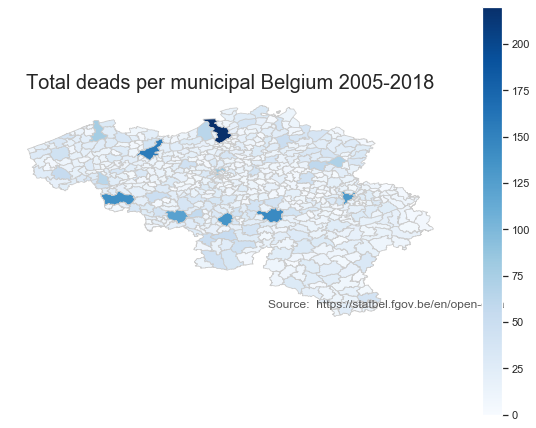

In [147]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'dead'

# set the range for the choropleth
vmin, vmax = 0, 220

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1,figsize=(10, 10)) #,figsize=(15, 15)

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8',figsize=(10,10))

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Total deads per municipal Belgium 2005-2018', \
              fontdict={'fontsize': '20',
                        'fontweight' : '2'})

# create an annotation for the  data source
ax.annotate('Source:  https://statbel.fgov.be/en/open-data',
           xy=(0.5, .3), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=12, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm,shrink=0.75)


os.chdir('D:\\GitHub\\Road_accidents_Belgium\\Plots')

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('BE_mun.png', dpi=100)

In [148]:
#create a plot per year
#make a gif out of the plots to see the changing pattern

In [149]:
import gif #https://pypi.org/project/gif/

In [150]:
os.getcwd()

'D:\\GitHub\\Road_accidents_Belgium\\Plots'

In [151]:
os.chdir('D:\\GitHub\\Road_accidents_Belgium\\Plots\\gif')

In [152]:
os.getcwd()

'D:\\GitHub\\Road_accidents_Belgium\\Plots\\gif'

In [153]:
df_gif = df_accidents[['refnismun','dead','year']]
df_gif = pd.DataFrame(df_gif.groupby(['year','refnismun'])['dead'].sum()).reset_index()

In [154]:
df_gif.columns=['year','CODE_INS','dead']

In [155]:
df_gif.head()

,year,CODE_INS,dead
0,2005,11001,0
1,2005,11002,14
2,2005,11004,0
3,2005,11005,1
4,2005,11007,2


In [156]:
type(df_gif['CODE_INS'].iloc[0])

numpy.int64

In [157]:
map_arcgis_mun.head()

,CODE_INS,geometry
0,11001,"POLYGON ((4.40125 51.14814, 4.40114 51.14797, ..."
1,11002,"POLYGON ((4.34109 51.35766, 4.34112 51.35760, ..."
2,11004,"POLYGON ((4.52882 51.19051, 4.52971 51.19020, ..."
3,11005,"POLYGON ((4.36411 51.10597, 4.36456 51.10596, ..."
4,11007,"POLYGON ((4.48350 51.20315, 4.48354 51.20314, ..."


In [158]:
map_arcgis_mun.shape

(589, 2)

In [159]:
type(map_arcgis_mun['CODE_INS'].iloc[0])

numpy.int32

In [160]:
merged_for_gif = pd.merge(map_arcgis_mun, df_gif, on='CODE_INS')

In [161]:
merged_for_gif

,CODE_INS,geometry,year,dead
0,11001,"POLYGON ((4.40125 51.14814, 4.40114 51.14797, ...",2005,0
1,11001,"POLYGON ((4.40125 51.14814, 4.40114 51.14797, ...",2006,0
2,11001,"POLYGON ((4.40125 51.14814, 4.40114 51.14797, ...",2007,3
3,11001,"POLYGON ((4.40125 51.14814, 4.40114 51.14797, ...",2008,0
4,11001,"POLYGON ((4.40125 51.14814, 4.40114 51.14797, ...",2009,1
...,...,...,...,...
8223,93090,"POLYGON ((4.68190 50.11200, 4.68248 50.11173, ...",2014,0
8224,93090,"POLYGON ((4.68190 50.11200, 4.68248 50.11173, ...",2015,0
8225,93090,"POLYGON ((4.68190 50.11200, 4.68248 50.11173, ...",2016,1
8226,93090,"POLYGON ((4.68190 50.11200, 4.68248 50.11173, ...",2017,1


In [162]:
merged_for_gif[merged_for_gif['year']==2005]

,CODE_INS,geometry,year,dead
0,11001,"POLYGON ((4.40125 51.14814, 4.40114 51.14797, ...",2005,0
14,11002,"POLYGON ((4.34109 51.35766, 4.34112 51.35760, ...",2005,14
28,11004,"POLYGON ((4.52882 51.19051, 4.52971 51.19020, ...",2005,0
42,11005,"POLYGON ((4.36411 51.10597, 4.36456 51.10596, ...",2005,1
56,11007,"POLYGON ((4.48350 51.20315, 4.48354 51.20314, ...",2005,2
...,...,...,...,...
8158,93018,"POLYGON ((4.73690 50.20989, 4.73691 50.20988, ...",2005,1
8172,93022,"POLYGON ((4.57018 50.32252, 4.57102 50.32235, ...",2005,2
8186,93056,"POLYGON ((4.53842 50.22916, 4.53846 50.22836, ...",2005,7
8200,93088,"POLYGON ((4.50451 50.32896, 4.50458 50.32889, ...",2005,1


In [163]:
# #Decorate a Matplotlib plot function with gif.frame:

@gif.frame
def plot_year(year):
    variable = 'dead'
    vmin, vmax = 0, 220
    fig, ax = plt.subplots(1,dpi=100) #figsize=(30, 30),
    merged_for_gif[merged_for_gif['year']==year].plot(column=variable,cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')#,figsize=(30,30)
    ax.axis('off')
    ax.set_title('Death by road accident per Belgian municipalities in '+str(year),fontdict={'fontsize': '10','fontweight' : '2'})
    ax.annotate('data source: https://statbel.fgov.be/en/open-data',
           xy=(0.5, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=8, color='#555555')
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)


In [164]:
# #Decorate a Matplotlib plot function with gif.frame:

# @gif.frame
# def plot_year(year):
#     variable = 'dead'
#     merged_for_gif[merged_for_gif['year']==year].plot(column=variable,cmap='Blues', linewidth=0.8, edgecolor='0.8')
#     plt.title('Total deads per municipal Belgium '+str(year))
#     plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
   

In [165]:
yearyear = np.linspace(2005, 2018, num=14)
yearyear=yearyear.astype(int)

In [166]:
yearyear

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018])

In [167]:
#Build a bunch of "frames" with a standard for loop:
frames = []
for _ in yearyear:
    frame = plot_year(_)
    frames.append(frame)
    
#Select the duration (milliseconds) between each frame and save
gif.save(frames, "accidents_over_time.gif", duration=3000)

In [168]:
os.getcwd()

'D:\\GitHub\\Road_accidents_Belgium\\Plots\\gif'

In [169]:
from IPython.display import Image

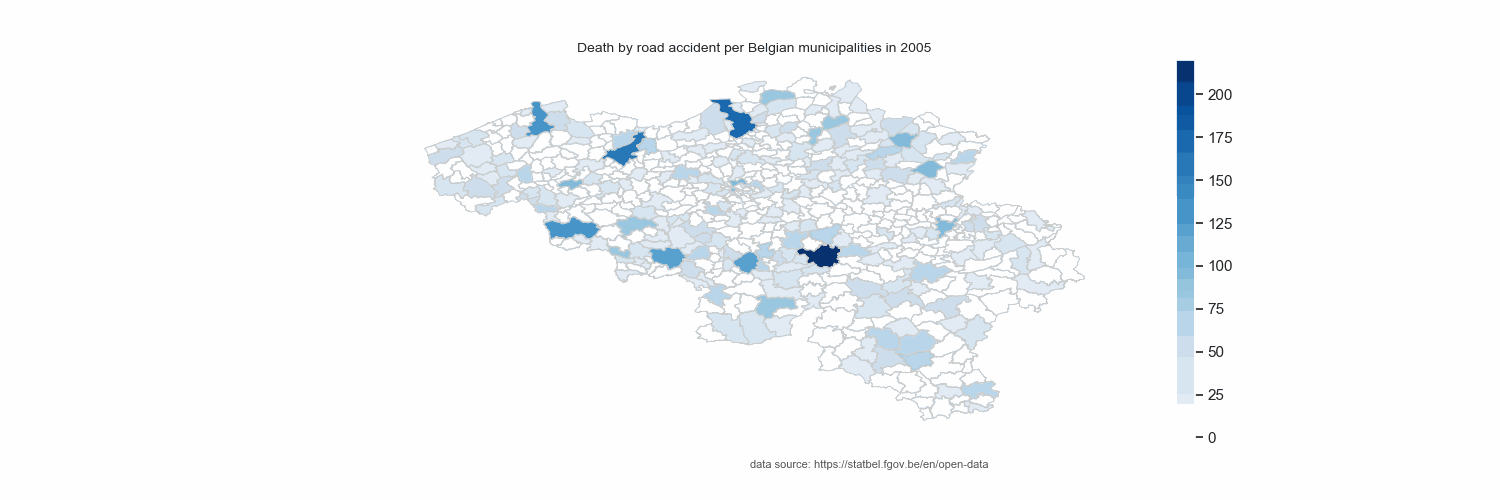

In [170]:
with open('D:\\GitHub\\Road_accidents_Belgium\\Plots\\gif\\accidents_over_time.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

In [171]:
df_reduced.head()

,CODE_INS,dead
0,11001,11
1,11002,199
2,11004,6
3,11005,3
4,11007,3


In [172]:
df_accidents[df_accidents['dead']==1]['refnismun'].value_counts(ascending=False).head(20)

11002    199
44021    142
92094    130
57081    126
52011    122
62063    118
53053    111
21004     78
31005     70
71016     65
34022     58
46003     57
71022     54
55022     52
33011     50
93088     48
13008     46
56005     46
51004     45
93056     41
Name: refnismun, dtype: int64

In [173]:
df_accidents[df_accidents['dead']==1]['refnismun'].value_counts().mean()

16.08732876712329

In [174]:
df_accidents[df_accidents['dead']==1]['refnismun'].value_counts().max()

199

In [175]:
df_accidents[df_accidents['dead']==1]['refnismun'].value_counts().min()

1

In [176]:
#Explore municipalities

findmun = "D:\\GitHub\\Road_accidents_Belgium\\Geoplot\\Arcgis\\municipalities\\bemun.shp"
mapped_mun = gpd.read_file(findmun)

In [177]:
mapped_mun = mapped_mun.drop(['OBJECTID','ADMUNAFR','ADMUNADU','ADMUNAGE','arrond','geometry'],axis=1)

In [178]:
type(mapped_mun['CODE_INS'].iloc[0])

str

In [179]:
mapped_mun['CODE_INS']=mapped_mun['CODE_INS'].astype(int)

In [180]:
mun_name = pd.merge(df_reduced, mapped_mun, on='CODE_INS')

In [181]:
mun_name

,CODE_INS,dead,Communes
0,11001,11,Aartselaar
1,11002,199,Antwerpen
2,11004,6,Boechout
3,11005,3,Boom
4,11007,3,Borsbeek
...,...,...,...
584,93018,10,Doische
585,93022,24,Florennes
586,93056,41,Philippeville
587,93088,48,Walcourt


In [182]:
mun_name.sort_values([('dead')],ascending=False)[:15] 

,CODE_INS,dead,Communes
1,11002,199,Antwerpen
277,44021,142,Gent
573,92094,130,Namur
375,57081,126,Tournai
319,52011,122,Charleroi
408,62063,118,LiÃ¨ge
338,53053,111,Mons
73,21004,78,Bruxelles
183,31005,70,Brugge
466,71016,65,Genk


Ok these municipalities have the most deads
But how about the amount of people living in it
How about it being a hotsport for companies and thus people from other municipalities going there more often than other places?

Nonetheles there are more deads  

In [183]:
df_accidents.head()

,where,how,illumination,typeofroad,refnismun,refnisdist,refnisprov,refnisgew,dead,deadafter30d,mortallyinjured,severelyinjured,slightlyinjured,month,year,quarter,dayow,hr
0,2.0,4.0,1.0,2.0,11001,11000,10000.0,2000,0,0,0,0,1,1,2005,1,2,10
1,1.0,4.0,1.0,2.0,11001,11000,10000.0,2000,0,0,0,0,1,1,2005,1,3,16
2,1.0,4.0,1.0,2.0,11001,11000,10000.0,2000,0,0,0,0,1,1,2005,1,2,16
3,1.0,7.0,3.0,2.0,11001,11000,10000.0,2000,0,0,0,0,1,1,2005,1,2,24
4,2.0,4.0,3.0,2.0,11001,11000,10000.0,2000,0,0,0,0,1,1,2005,1,2,19


In [184]:
os.getcwd()

'D:\\GitHub\\Road_accidents_Belgium\\Plots\\gif'

In [185]:
os.chdir('D:\\GitHub\\Road_accidents_Belgium\\Plots\\')

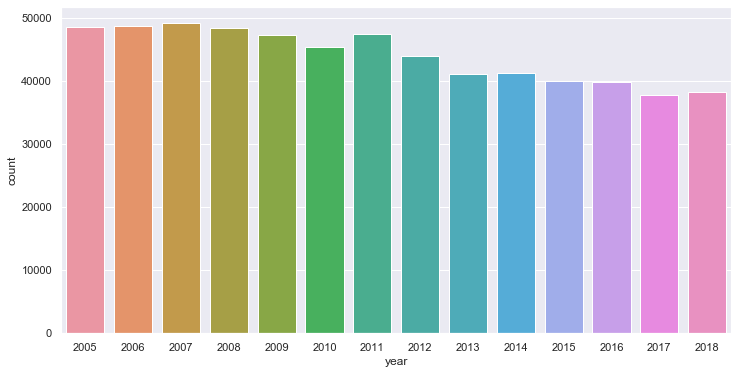

In [186]:
plt.figure(figsize=(12,6))
sns_plot = sns.countplot(df_accidents['year'])
fig = sns_plot.get_figure()
fig.savefig('recorded_accidents_per_year.png', dpi=300)

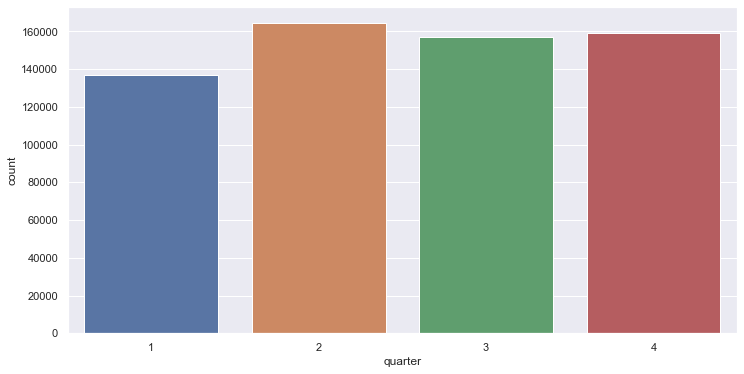

In [187]:
plt.figure(figsize=(12,6))
sns_plot = sns.countplot(df_accidents['quarter'])
fig = sns_plot.get_figure()
fig.savefig('recorded_accidents_per_quarter.png', dpi=100)

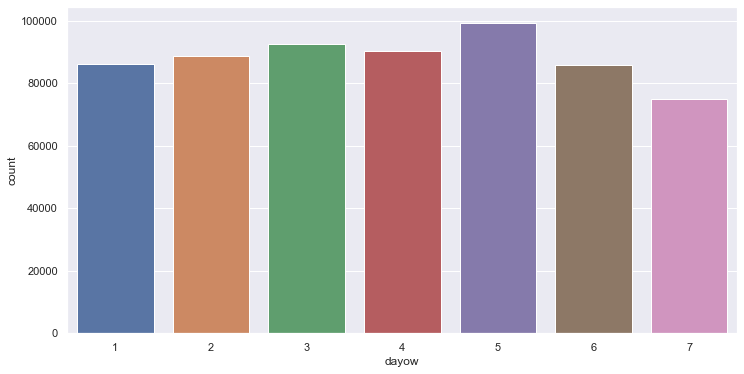

In [188]:
plt.figure(figsize=(12,6))
sns_plot = sns.countplot(df_accidents['dayow'])
fig = sns_plot.get_figure()
fig.savefig('recorded_accidents_per_dayow.png', dpi=100)

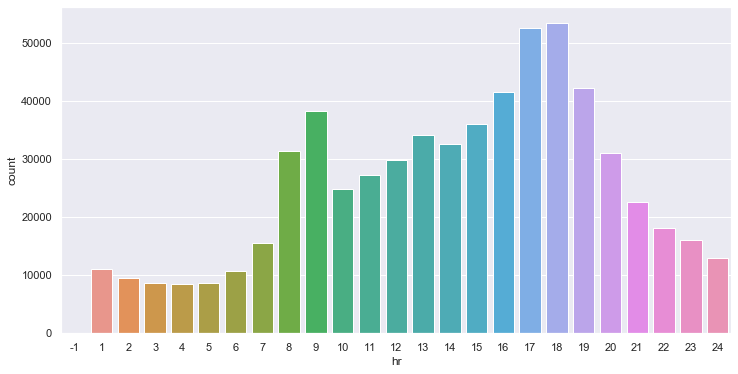

In [189]:
plt.figure(figsize=(12,6))
sns_plot = sns.countplot(df_accidents['hr'])
fig = sns_plot.get_figure()
fig.savefig('recorded_accidents_per_hr.png', dpi=100)

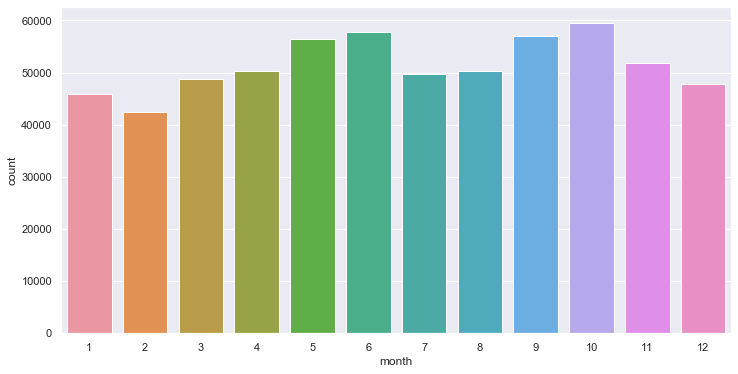

In [190]:
plt.figure(figsize=(12,6))
sns_plot = sns.countplot(df_accidents['month'])
fig = sns_plot.get_figure()
fig.savefig('recorded_accidents_per_month.png', dpi=100)

In [191]:
print(df_accidents['dead'].value_counts())
print(df_accidents['deadafter30d'].value_counts())
print(df_accidents['mortallyinjured'].value_counts())
print(df_accidents['severelyinjured'].value_counts())
print(df_accidents['slightlyinjured'].value_counts())

0    608575
1      9395
2         2
Name: dead, dtype: int64
0    606804
1     11166
2         2
Name: deadafter30d, dtype: int64
0    616201
1      1771
Name: mortallyinjured, dtype: int64
0    553973
1     63965
2        34
Name: severelyinjured, dtype: int64
1    540415
0     74707
2      2771
3        72
4         6
5         1
Name: slightlyinjured, dtype: int64


In [192]:
df_accidents.groupby('year').agg({'dead': [np.mean],
                                  'deadafter30d': [np.mean],
                                  'mortallyinjured':[np.mean],
                                  'severelyinjured':[np.mean],
                                  'slightlyinjured':[np.mean]})

,dead,deadafter30d,mortallyinjured,severelyinjured,slightlyinjured
,mean,mean,mean,mean,mean
year,,,,,
2005,0.018722,0.021291,0.002569,0.113093,0.871966
2006,0.018873,0.021048,0.002175,0.113999,0.870328
2007,0.018722,0.020751,0.002028,0.116673,0.869026
2008,0.016560,0.018563,0.002003,0.113298,0.873777
2009,0.017004,0.018947,0.001943,0.115033,0.871850
2010,0.015957,0.017496,0.001539,0.107460,0.880517
2011,0.015469,0.017282,0.001812,0.106409,0.882885
2012,0.014188,0.017412,0.003224,0.095821,0.891489


In [193]:
# dead =                Number of accidents with dead
# deadafter30d =        Number of accidents with dead 30 days
# mortallyinjured =     Number of accidents with mortally injured
# severelyinjured =     Number of accidents with severely injured
# slightlyinjured =     Number of accidents with slightly injured

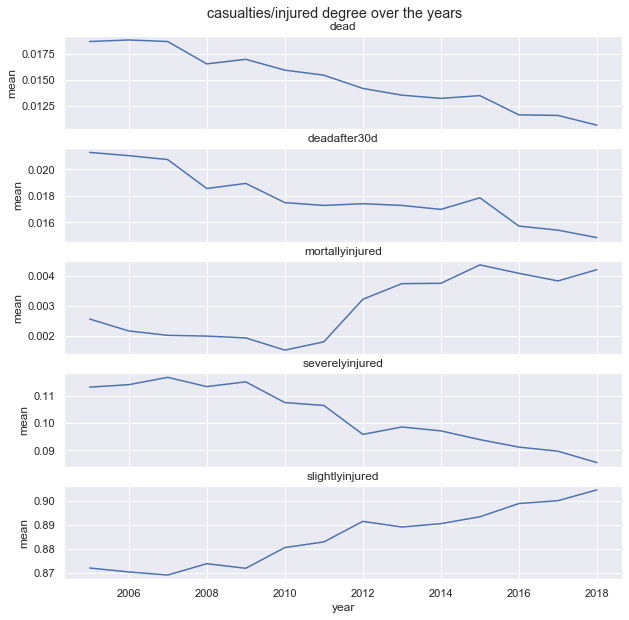

In [204]:
fig, axs = plt.subplots(5)

fig.set_figheight(10)
fig.set_figwidth(10)

fig.suptitle('casualties/injured degree over the years',x=0.5,y=0.92)

axs[0].plot(df_accidents.groupby('year').agg({'dead': [np.mean]}))
axs[0].set_title('dead')
axs[1].plot(df_accidents.groupby('year').agg({'deadafter30d': [np.mean]}))
axs[1].set_title('deadafter30d')
axs[2].plot(df_accidents.groupby('year').agg({'mortallyinjured': [np.mean]}))
axs[2].set_title('mortallyinjured')
axs[3].plot(df_accidents.groupby('year').agg({'severelyinjured': [np.mean]}))
axs[3].set_title('severelyinjured')
axs[4].plot(df_accidents.groupby('year').agg({'slightlyinjured': [np.mean]}))
axs[4].set_title('slightlyinjured')

for ax in axs.flat:
    ax.set(xlabel='year', ylabel='mean')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
# #same y scale
# for ax in axs.flat:
#     ax.set_ylim([0,0.1])

fig.savefig('mean_accidents_mort_inj_over_time.png', dpi=100)

In [205]:
df_accidents.head()

,where,how,illumination,typeofroad,refnismun,refnisdist,refnisprov,refnisgew,dead,deadafter30d,mortallyinjured,severelyinjured,slightlyinjured,month,year,quarter,dayow,hr
0,2.0,4.0,1.0,2.0,11001,11000,10000.0,2000,0,0,0,0,1,1,2005,1,2,10
1,1.0,4.0,1.0,2.0,11001,11000,10000.0,2000,0,0,0,0,1,1,2005,1,3,16
2,1.0,4.0,1.0,2.0,11001,11000,10000.0,2000,0,0,0,0,1,1,2005,1,2,16
3,1.0,7.0,3.0,2.0,11001,11000,10000.0,2000,0,0,0,0,1,1,2005,1,2,24
4,2.0,4.0,3.0,2.0,11001,11000,10000.0,2000,0,0,0,0,1,1,2005,1,2,19


In [210]:
df_accidents.to_csv(r'D:\\GitHub\\Road_accidents_Belgium\\numeric_accidents_data.csv', index = False)

In [196]:
print('total dead : '+ str(len(df_accidents[df_accidents['dead']==1])))
print('total deadafter30d : '+ str(len(df_accidents[df_accidents['deadafter30d']==1])))
print('total mortallyinjured : '+ str(len(df_accidents[df_accidents['mortallyinjured']==1])))
print('total severelyinjured : '+ str(len(df_accidents[df_accidents['severelyinjured']==1])))
print('total slightlyinjured : '+ str(len(df_accidents[df_accidents['slightlyinjured']==1])))

total dead : 9395
total deadafter30d : 11166
total mortallyinjured : 1771
total severelyinjured : 63965
total slightlyinjured : 540415


In [197]:
df_accidents.shape

(617972, 18)

In [198]:
print('% dead : '+ str(len(df_accidents[df_accidents['dead']==1])/617972*100)+'%')
print('% deadafter30d : '+ str(len(df_accidents[df_accidents['deadafter30d']==1])/617972*100)+'%')
print('% mortallyinjured : '+ str(len(df_accidents[df_accidents['mortallyinjured']==1])/617972*100)+'%')
print('% severelyinjured : '+ str(len(df_accidents[df_accidents['severelyinjured']==1])/617972*100)+'%')
print('% slightlyinjured : '+ str(len(df_accidents[df_accidents['slightlyinjured']==1])/617972*100)+'%')

% dead : 1.520295417915375%
% deadafter30d : 1.8068779815266711%
% mortallyinjured : 0.2865825636112963%
% severelyinjured : 10.350792592544646%
% slightlyinjured : 87.44975500508113%


In [199]:
corr_ = df_accidents[['dead','deadafter30d']]
corr__ = df_accidents[['dead','mortallyinjured']]

In [200]:
corrMatrix_ = corr_.corr()
corrMatrix__ = corr__.corr()

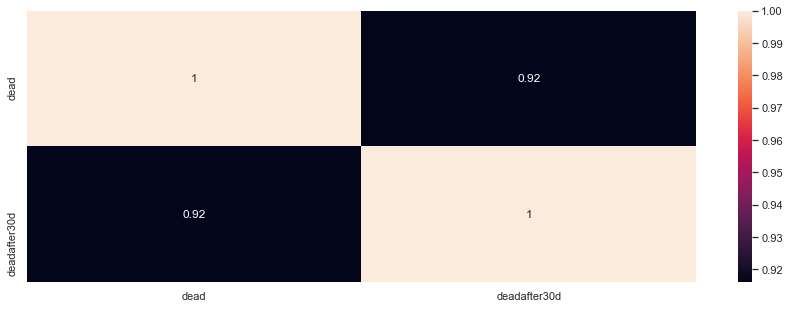

In [201]:
sns.heatmap(corrMatrix_,annot=True)

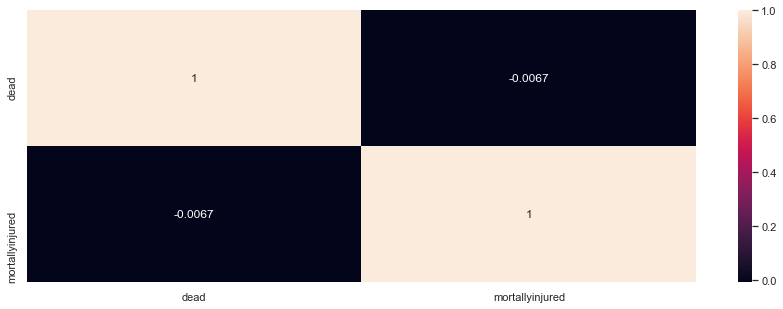

In [202]:
sns.heatmap(corrMatrix__,annot=True)